<a href="https://colab.research.google.com/github/ShanRinna/DL3/blob/main/DNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
import tensorflow as tf
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15255702461328488609
 xla_global_id: -1]

In [ ]:
device_name = tf.test.gpu_device_name()
if len(device_name)>0:
    print(f'GPU has been found... device name is{device_name}')
else:
    print('No GPU has been found...')

GPU has been found... device name is/device:GPU:0


In [2]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [3]:
#df = pd.read_csv('/content/sample_data/House_Rent_Dataset.csv') #y:連續變數
# Colab
df = pd.read_csv('/content/House_Rent_Dataset.csv')
df

Rent  Size  BHK  Bathroom Furnishing Status       City
0     10000  1100    2         2       Unfurnished    Kolkata
1     20000   800    2         1    Semi-Furnished    Kolkata
2     17000  1000    2         1    Semi-Furnished    Kolkata
3     10000   800    2         1       Unfurnished    Kolkata
4      7500   850    2         1       Unfurnished    Kolkata
...     ...   ...  ...       ...               ...        ...
4741  15000  1000    2         2    Semi-Furnished  Hyderabad
4742  29000  2000    3         3    Semi-Furnished  Hyderabad
4743  35000  1750    3         3    Semi-Furnished  Hyderabad
4744  45000  1500    3         2    Semi-Furnished  Hyderabad
4745  15000  1000    2         2       Unfurnished  Hyderabad

[4746 rows x 6 columns]

In [4]:
print(df[['Furnishing Status']].value_counts(sort=True))
print('+-----------------------+')
print(df[['City']].value_counts(sort=True))
print('+-----------------------+')

Furnishing Status
Semi-Furnished       2251
Unfurnished          1815
Furnished             680
dtype: int64
+-----------------------+
City     
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
dtype: int64
+-----------------------+


In [5]:
dummied_df=pd.get_dummies(df,columns=['Furnishing Status','City'])
dummied_df

Rent  Size  BHK  Bathroom  Furnishing Status_Furnished  \
0     10000  1100    2         2                            0   
1     20000   800    2         1                            0   
2     17000  1000    2         1                            0   
3     10000   800    2         1                            0   
4      7500   850    2         1                            0   
...     ...   ...  ...       ...                          ...   
4741  15000  1000    2         2                            0   
4742  29000  2000    3         3                            0   
4743  35000  1750    3         3                            0   
4744  45000  1500    3         2                            0   
4745  15000  1000    2         2                            0   

      Furnishing Status_Semi-Furnished  Furnishing Status_Unfurnished  \
0                                    0                              1   
1                                    1                              0   
2                                    1                              0   
3                                    0                              1   
4                                    0                              1   
...                                ...                            ...   
4741                                 1                              0   
4742                                 1                              0   
4743                                 1                              0   
4744                                 1                              0   
4745                                 0                              1   

      City_Bangalore  City_Chennai  City_Delhi  City_Hyderabad  City_Kolkata  \
0                  0             0           0               0             1   
1                  0             0           0               0             1   
2                  0             0           0               0             1   
3                  0             0           0               0             1   
4                  0             0           0               0             1   
...              ...           ...         ...             ...           ...   
4741               0             0           0               1             0   
4742               0             0           0               1             0   
4743               0             0           0               1             0   
4744               0             0           0               1             0   
4745               0             0           0               1             0   

      City_Mumbai  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
4741            0  
4742            0  
4743            0  
4744            0  
4745            0  

[4746 rows x 13 columns]

In [6]:
dummied_df.to_csv('/content/sample_data/House_Rent_Dataset.csv',index=False, header=True)
# Colab
#dummied_new_df.to_csv('House_Rent_dummied.csv',index=False, header=True)
print('Export complete...')

Export complete...


In [7]:
#set x (make prediction) with minimax
x=dummied_df.drop(['Rent'],axis=1).copy()  #training:模型內部評估testing:跨模型評估(選模)

#set y (want to predict)
y=dummied_df['Rent'].copy()

In [8]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(x)
scaled_x=pd.DataFrame(data=scaling)
scaled_x.columns=x.columns
scaled_x.head()

Size  BHK  Bathroom  Furnishing Status_Furnished  \
0  0.136421  0.2  0.111111                          0.0   
1  0.098874  0.2  0.000000                          0.0   
2  0.123905  0.2  0.000000                          0.0   
3  0.098874  0.2  0.000000                          0.0   
4  0.105131  0.2  0.000000                          0.0   

   Furnishing Status_Semi-Furnished  Furnishing Status_Unfurnished  \
0                               0.0                            1.0   
1                               1.0                            0.0   
2                               1.0                            0.0   
3                               0.0                            1.0   
4                               0.0                            1.0   

   City_Bangalore  City_Chennai  City_Delhi  City_Hyderabad  City_Kolkata  \
0             0.0           0.0         0.0             0.0           1.0   
1             0.0           0.0         0.0             0.0           1.0   
2             0.0           0.0         0.0             0.0           1.0   
3             0.0           0.0         0.0             0.0           1.0   
4             0.0           0.0         0.0             0.0           1.0   

   City_Mumbai  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [9]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=5)

In [10]:
# Quick recap: Total of 12 features in the data set
scaled_x.head()

Size  BHK  Bathroom  Furnishing Status_Furnished  \
0  0.136421  0.2  0.111111                          0.0   
1  0.098874  0.2  0.000000                          0.0   
2  0.123905  0.2  0.000000                          0.0   
3  0.098874  0.2  0.000000                          0.0   
4  0.105131  0.2  0.000000                          0.0   

   Furnishing Status_Semi-Furnished  Furnishing Status_Unfurnished  \
0                               0.0                            1.0   
1                               1.0                            0.0   
2                               1.0                            0.0   
3                               0.0                            1.0   
4                               0.0                            1.0   

   City_Bangalore  City_Chennai  City_Delhi  City_Hyderabad  City_Kolkata  \
0             0.0           0.0         0.0             0.0           1.0   
1             0.0           0.0         0.0             0.0           1.0   
2             0.0           0.0         0.0             0.0           1.0   
3             0.0           0.0         0.0             0.0           1.0   
4             0.0           0.0         0.0             0.0           1.0   

   City_Mumbai  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [11]:
# Tips: Using shape to call the amount of features in the data set 
input_features=scaled_x.shape[1]
print('Amount of features:',input_features) #12個x，features decide layers

Amount of features: 12


In [12]:
from keras.losses import mse
from keras.backend import sqrt #loss function can choose，RMSE使值域較小

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects #keras has to login
get_custom_objects().update({'my_RMSE': my_RMSE}) #my_RMSE 自定，後面用此可呼叫出

In [13]:
# Some self define functions for building deep neural networks
def dense_generator(model_name,layers,last_layer_neurons,activation_fun='relu'):
    n=last_layer_neurons
    neurons=n
    for i in range(0,layers):
        neurons=neurons*2
        model_name.add(Dense(units=neurons, activation=activation_fun))

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.01,beta_1=0.5)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 6s 116ms/step - loss: 13327.7217 - MAPE: 37.0333 - val_loss: 13690.0557 - val_MAPE: 31.2084
Epoch 2/100
48/48 [==============================] - 6s 116ms/step - loss: 13010.2451 - MAPE: 36.5926 - val_loss: 12017.9014 - val_MAPE: 32.5740
Epoch 3/100
48/48 [==============================] - 6s 118ms/step - loss: 13163.5732 - MAPE: 36.1306 - val_loss: 12376.7158 - val_MAPE: 32.6191
Epoch 4/100
48/48 [==============================] - 6s 115ms/step - loss: 13084.5439 - MAPE: 36.0029 - val_loss: 12210.7080 - val_MAPE: 32.9905
Epoch 5/100
48/48 [==============================] - 6s 115ms/step - loss: 13230.4014 - MAPE: 37.9029 - val_loss: 12346.7695 - val_MAPE: 30.3965
Epoch 6/100
48/48 [==============================] - 5s 114ms/step - loss: 13662.5068 - MAPE: 37.9604 - val_loss: 13061.5371 - val_MAPE: 30.1305
Epoch 7/100
48/48 [==============================] - 6s 117ms/step - loss: 12992.6299 - MAPE: 35.8034 - val_loss: 12819.3369 - val

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

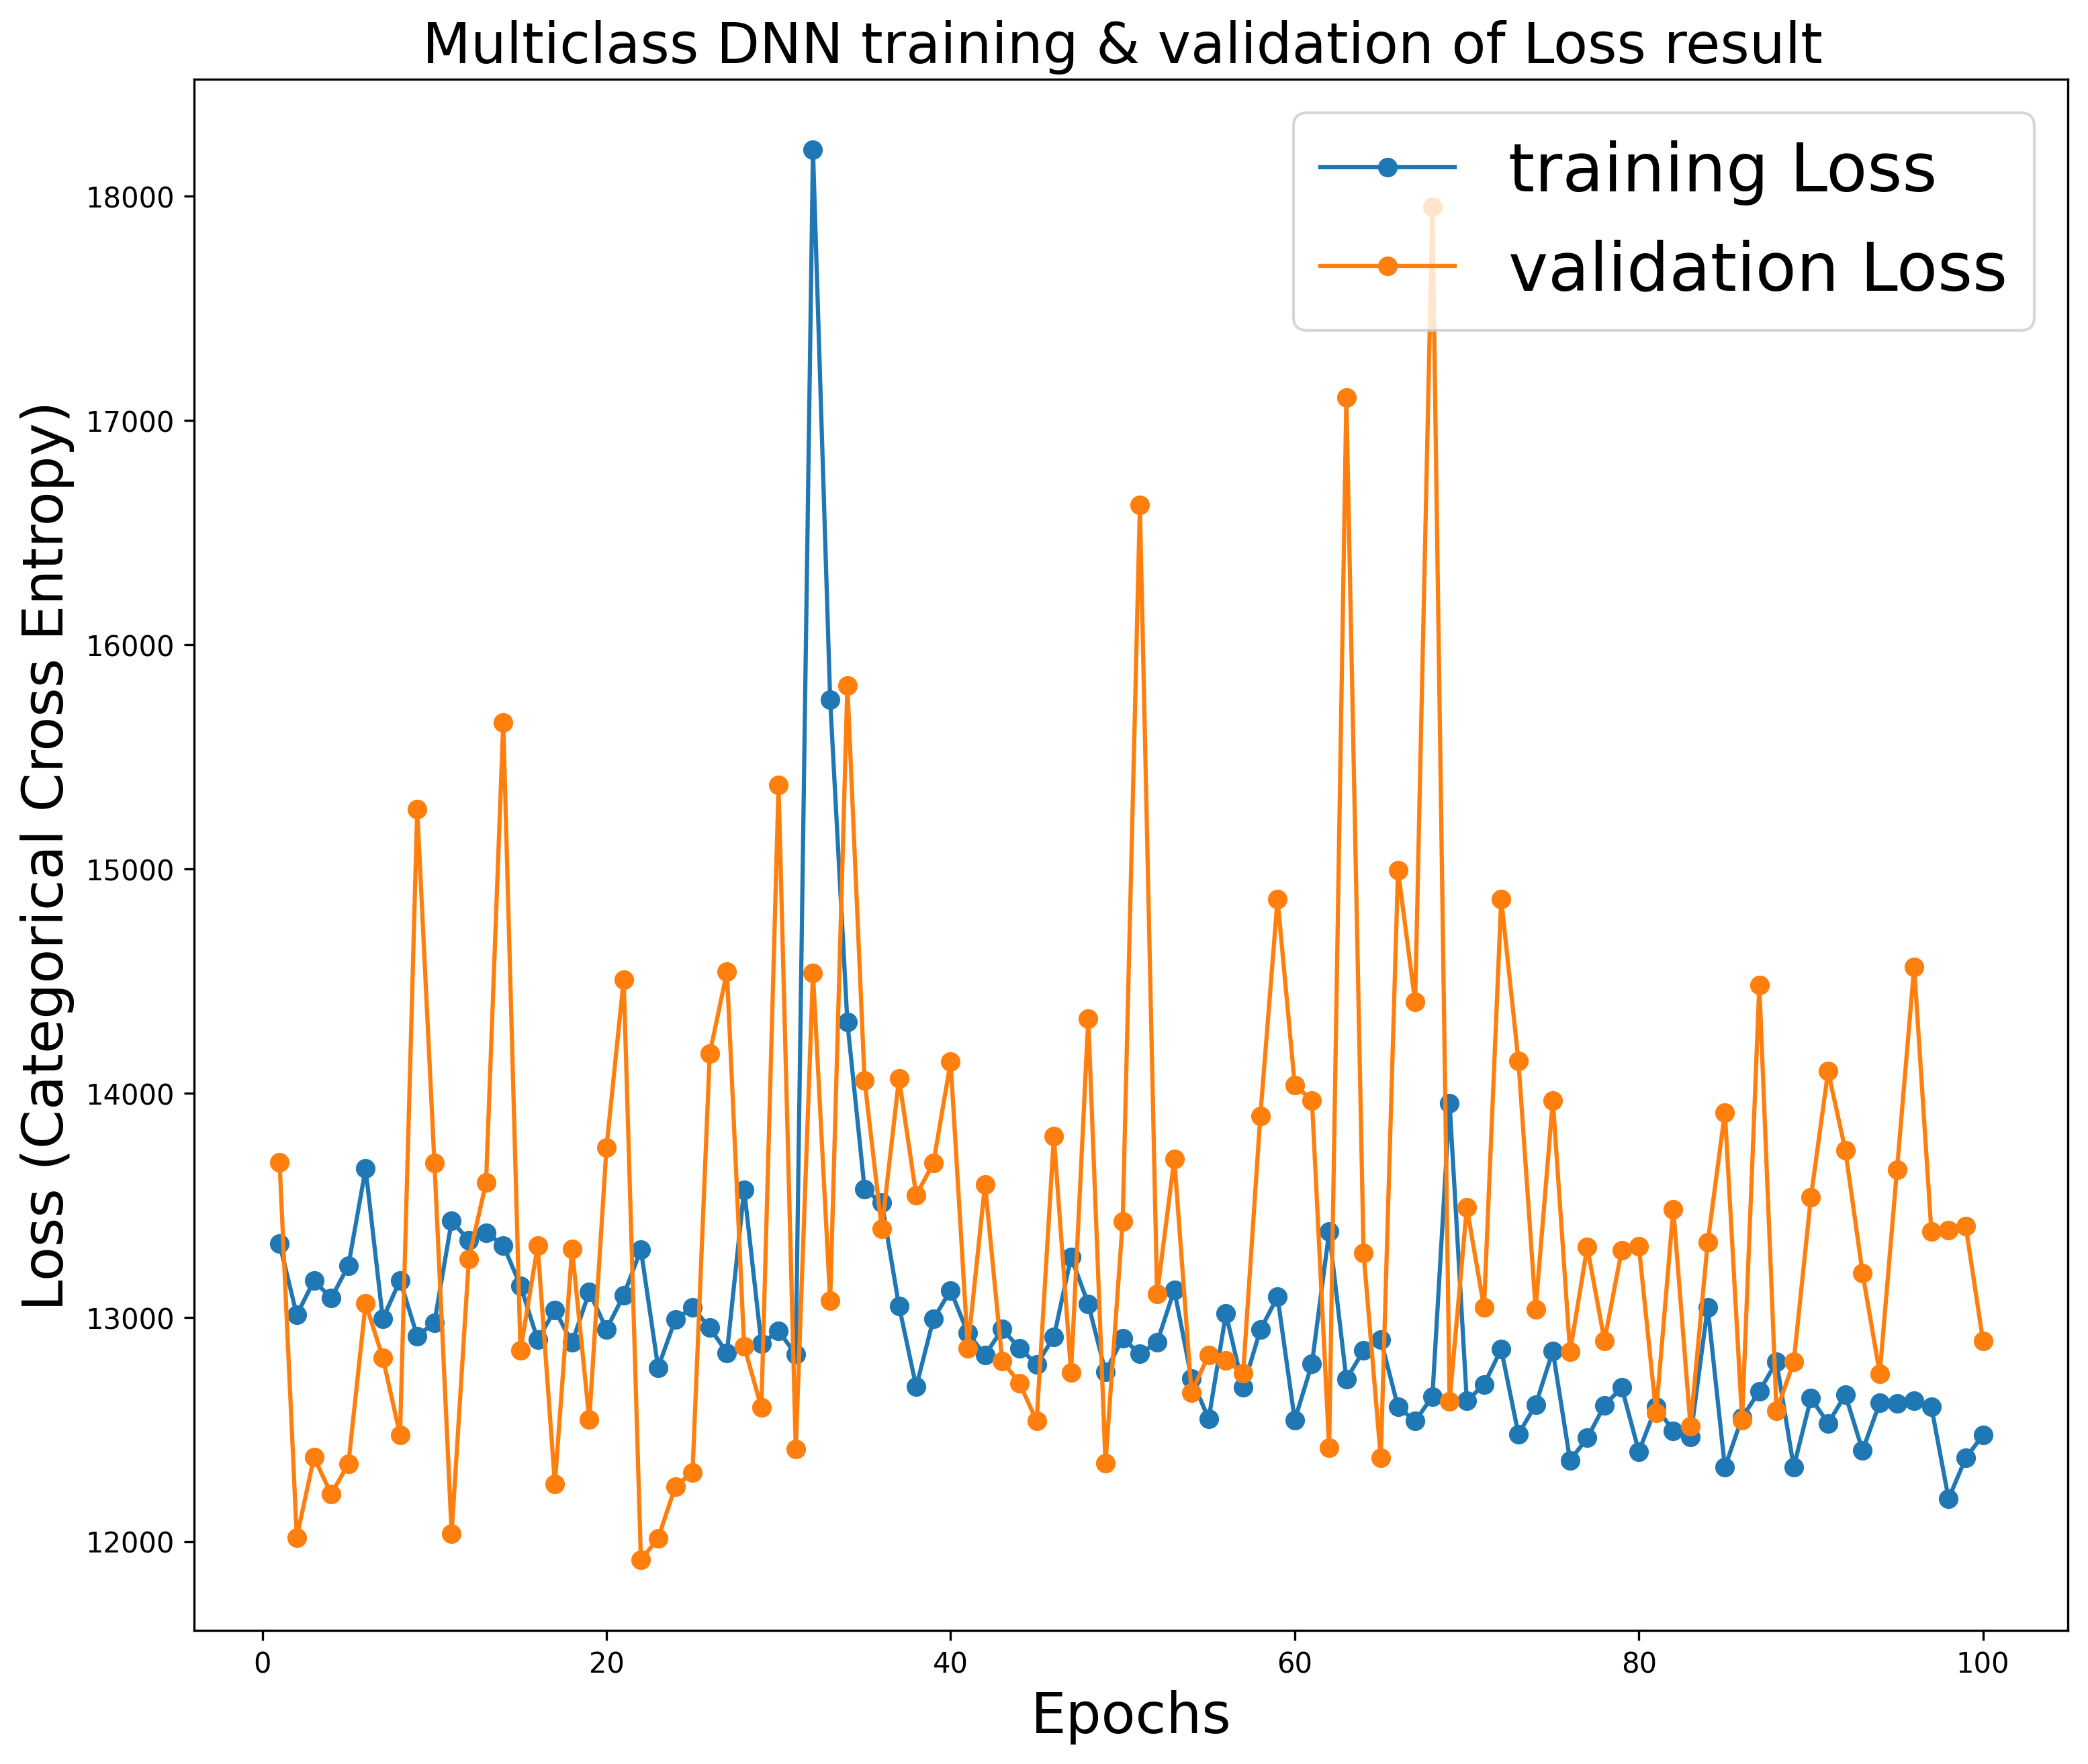

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.01,beta_1=0.7)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 7s 120ms/step - loss: 34275.5820 - MAPE: 127.9248 - val_loss: 21035.9570 - val_MAPE: 85.6805
Epoch 2/100
48/48 [==============================] - 6s 116ms/step - loss: 25853.7910 - MAPE: 73.8137 - val_loss: 31196.9004 - val_MAPE: 151.2908
Epoch 3/100
48/48 [==============================] - 5s 115ms/step - loss: 26218.9355 - MAPE: 74.6970 - val_loss: 33180.3125 - val_MAPE: 74.3345
Epoch 4/100
48/48 [==============================] - 6s 118ms/step - loss: 32252.4375 - MAPE: 108.5458 - val_loss: 28158.5742 - val_MAPE: 85.2828
Epoch 5/100
48/48 [==============================] - 6s 115ms/step - loss: 49794.8945 - MAPE: 249.2816 - val_loss: 37556.4648 - val_MAPE: 96.7866
Epoch 6/100
48/48 [==============================] - 6s 120ms/step - loss: 28072.9512 - MAPE: 81.9432 - val_loss: 28550.7344 - val_MAPE: 54.9677
Epoch 7/100
48/48 [==============================] - 6s 118ms/step - loss: 25651.4668 - MAPE: 69.3184 - val_loss: 27925.2148 -

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

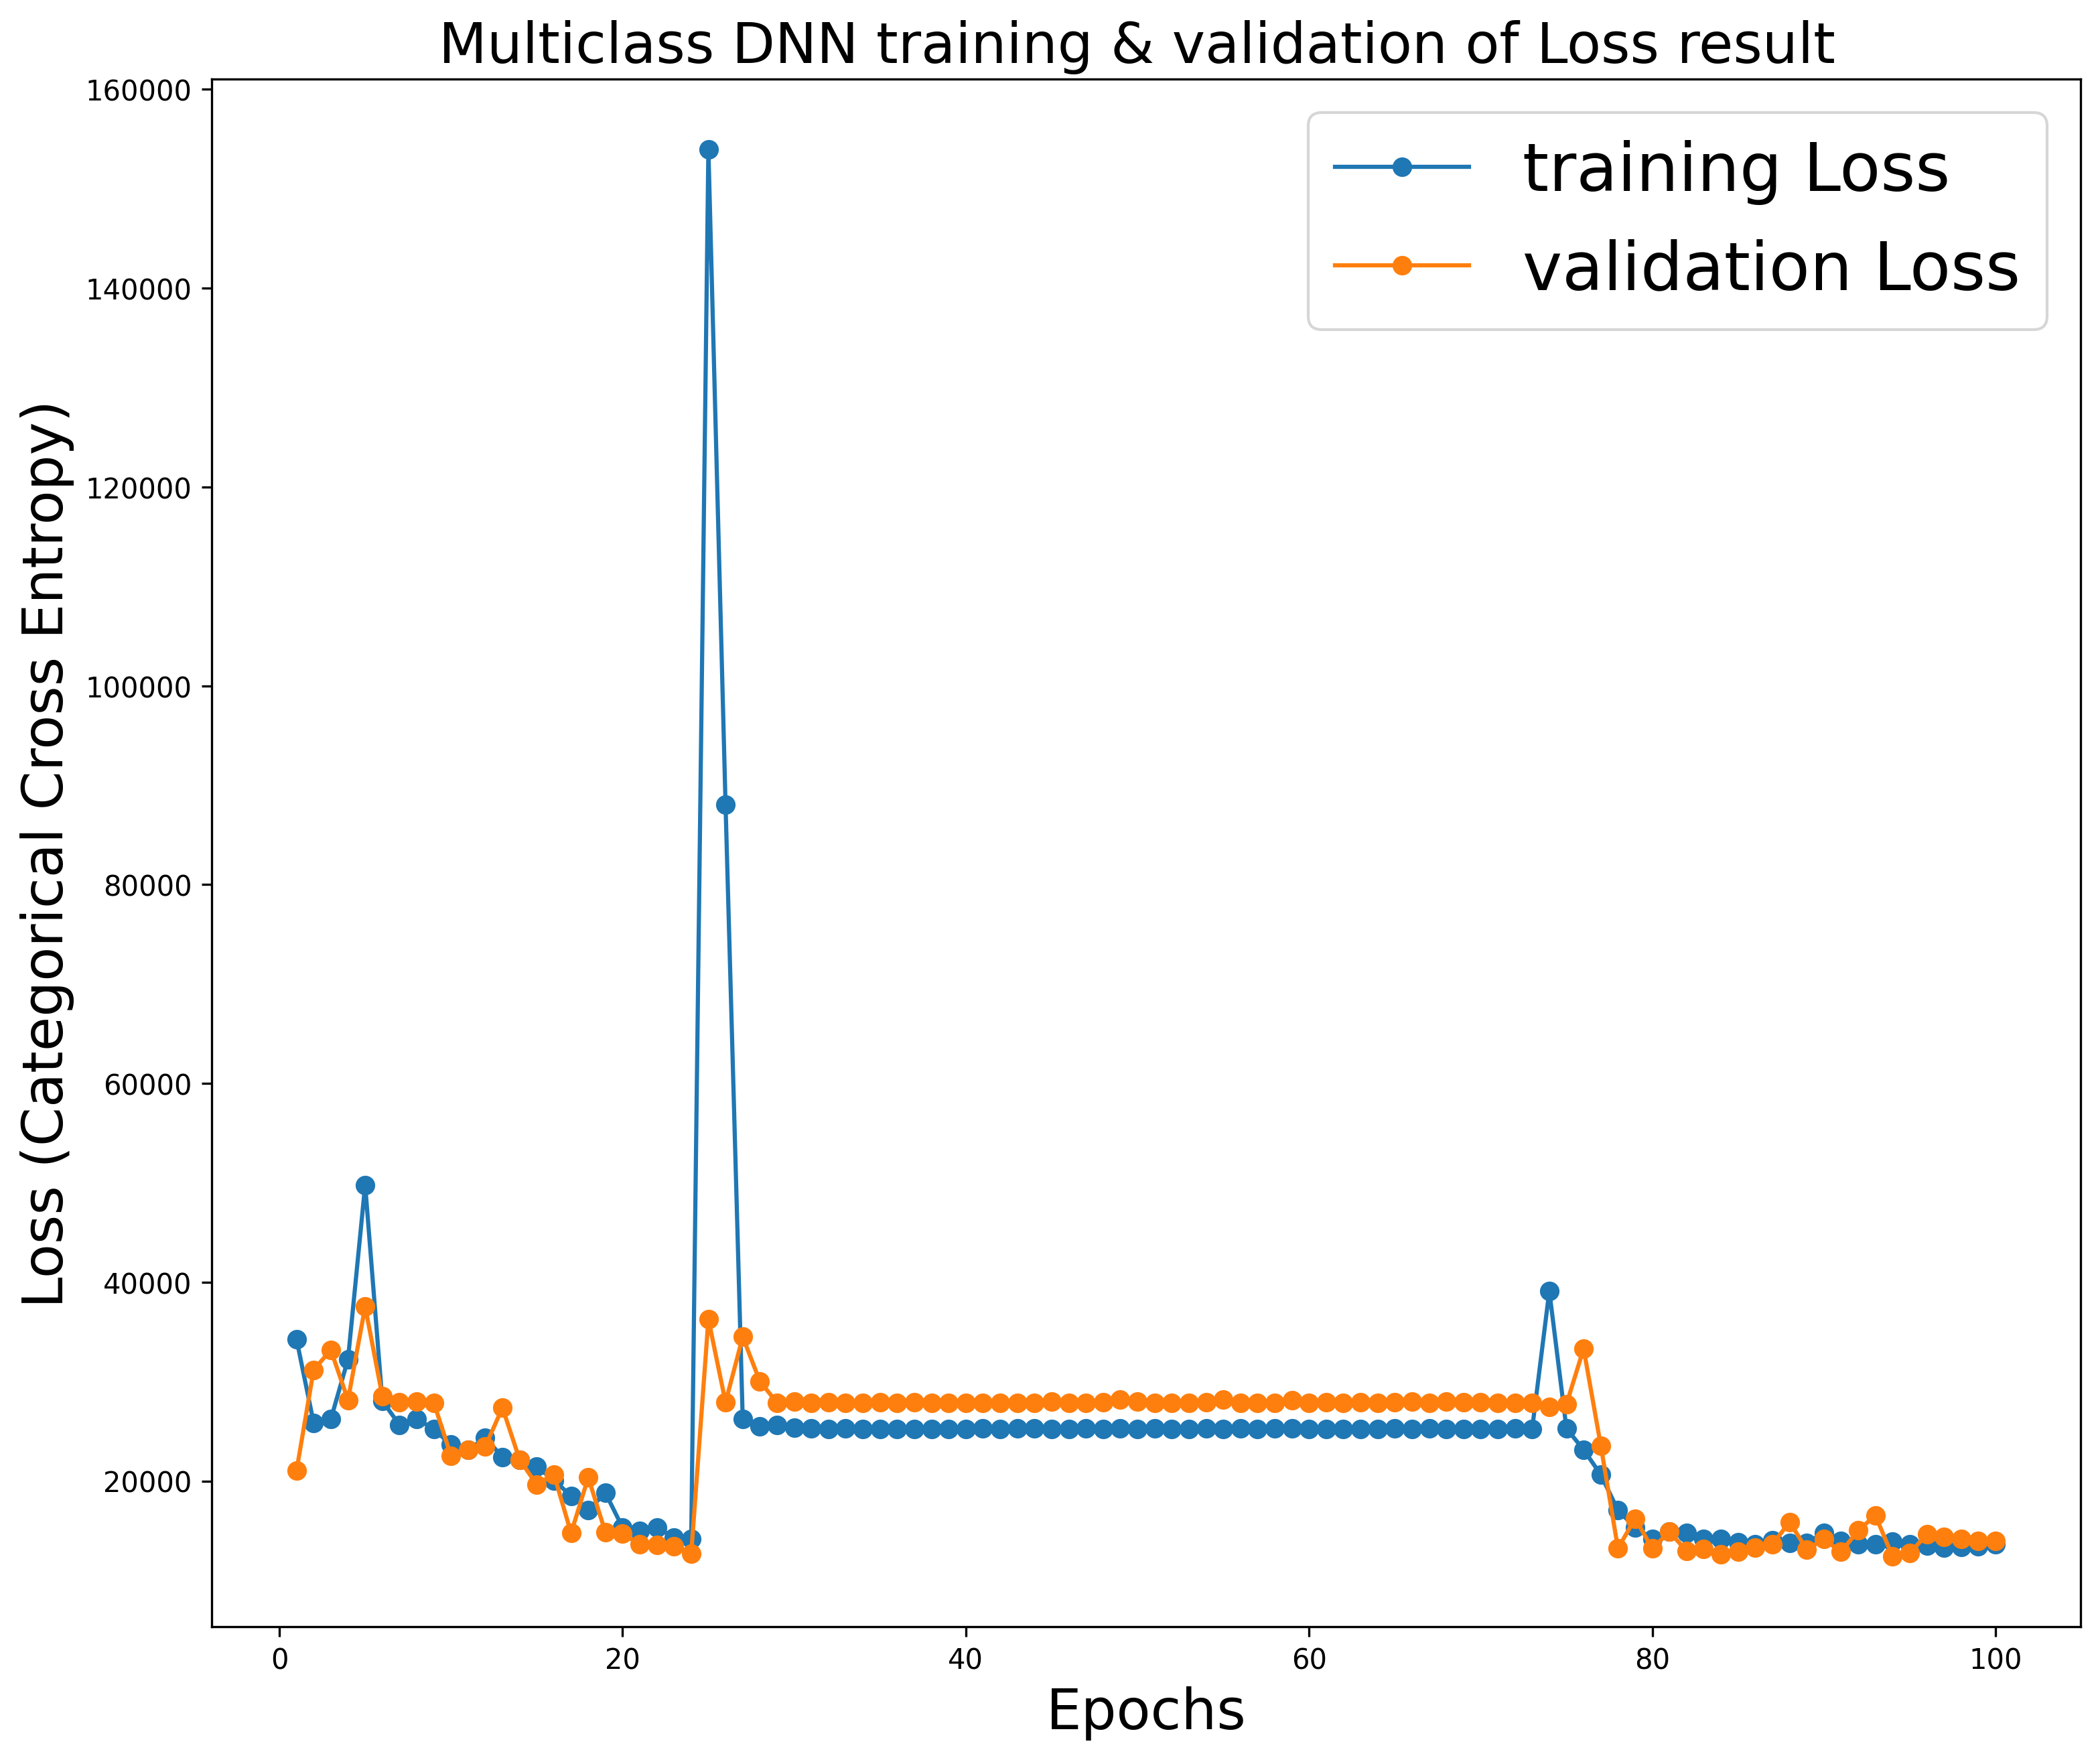

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.01,beta_1=0.9)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 6s 116ms/step - loss: 12812.4482 - MAPE: 38.3147 - val_loss: 14365.4092 - val_MAPE: 49.8340
Epoch 2/100
48/48 [==============================] - 5s 112ms/step - loss: 12676.4688 - MAPE: 36.0296 - val_loss: 17814.7676 - val_MAPE: 61.0109
Epoch 3/100
48/48 [==============================] - 6s 115ms/step - loss: 13090.1143 - MAPE: 37.2628 - val_loss: 19615.9102 - val_MAPE: 54.7573
Epoch 4/100
48/48 [==============================] - 6s 117ms/step - loss: 13524.8604 - MAPE: 39.5089 - val_loss: 15294.6162 - val_MAPE: 53.6681
Epoch 5/100
48/48 [==============================] - 6s 115ms/step - loss: 12372.1592 - MAPE: 35.7234 - val_loss: 14392.8379 - val_MAPE: 36.5901
Epoch 6/100
48/48 [==============================] - 6s 118ms/step - loss: 12957.0537 - MAPE: 38.6789 - val_loss: 17423.3418 - val_MAPE: 61.0559
Epoch 7/100
48/48 [==============================] - 6s 117ms/step - loss: 12488.5029 - MAPE: 36.0836 - val_loss: 13947.3184 - val

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

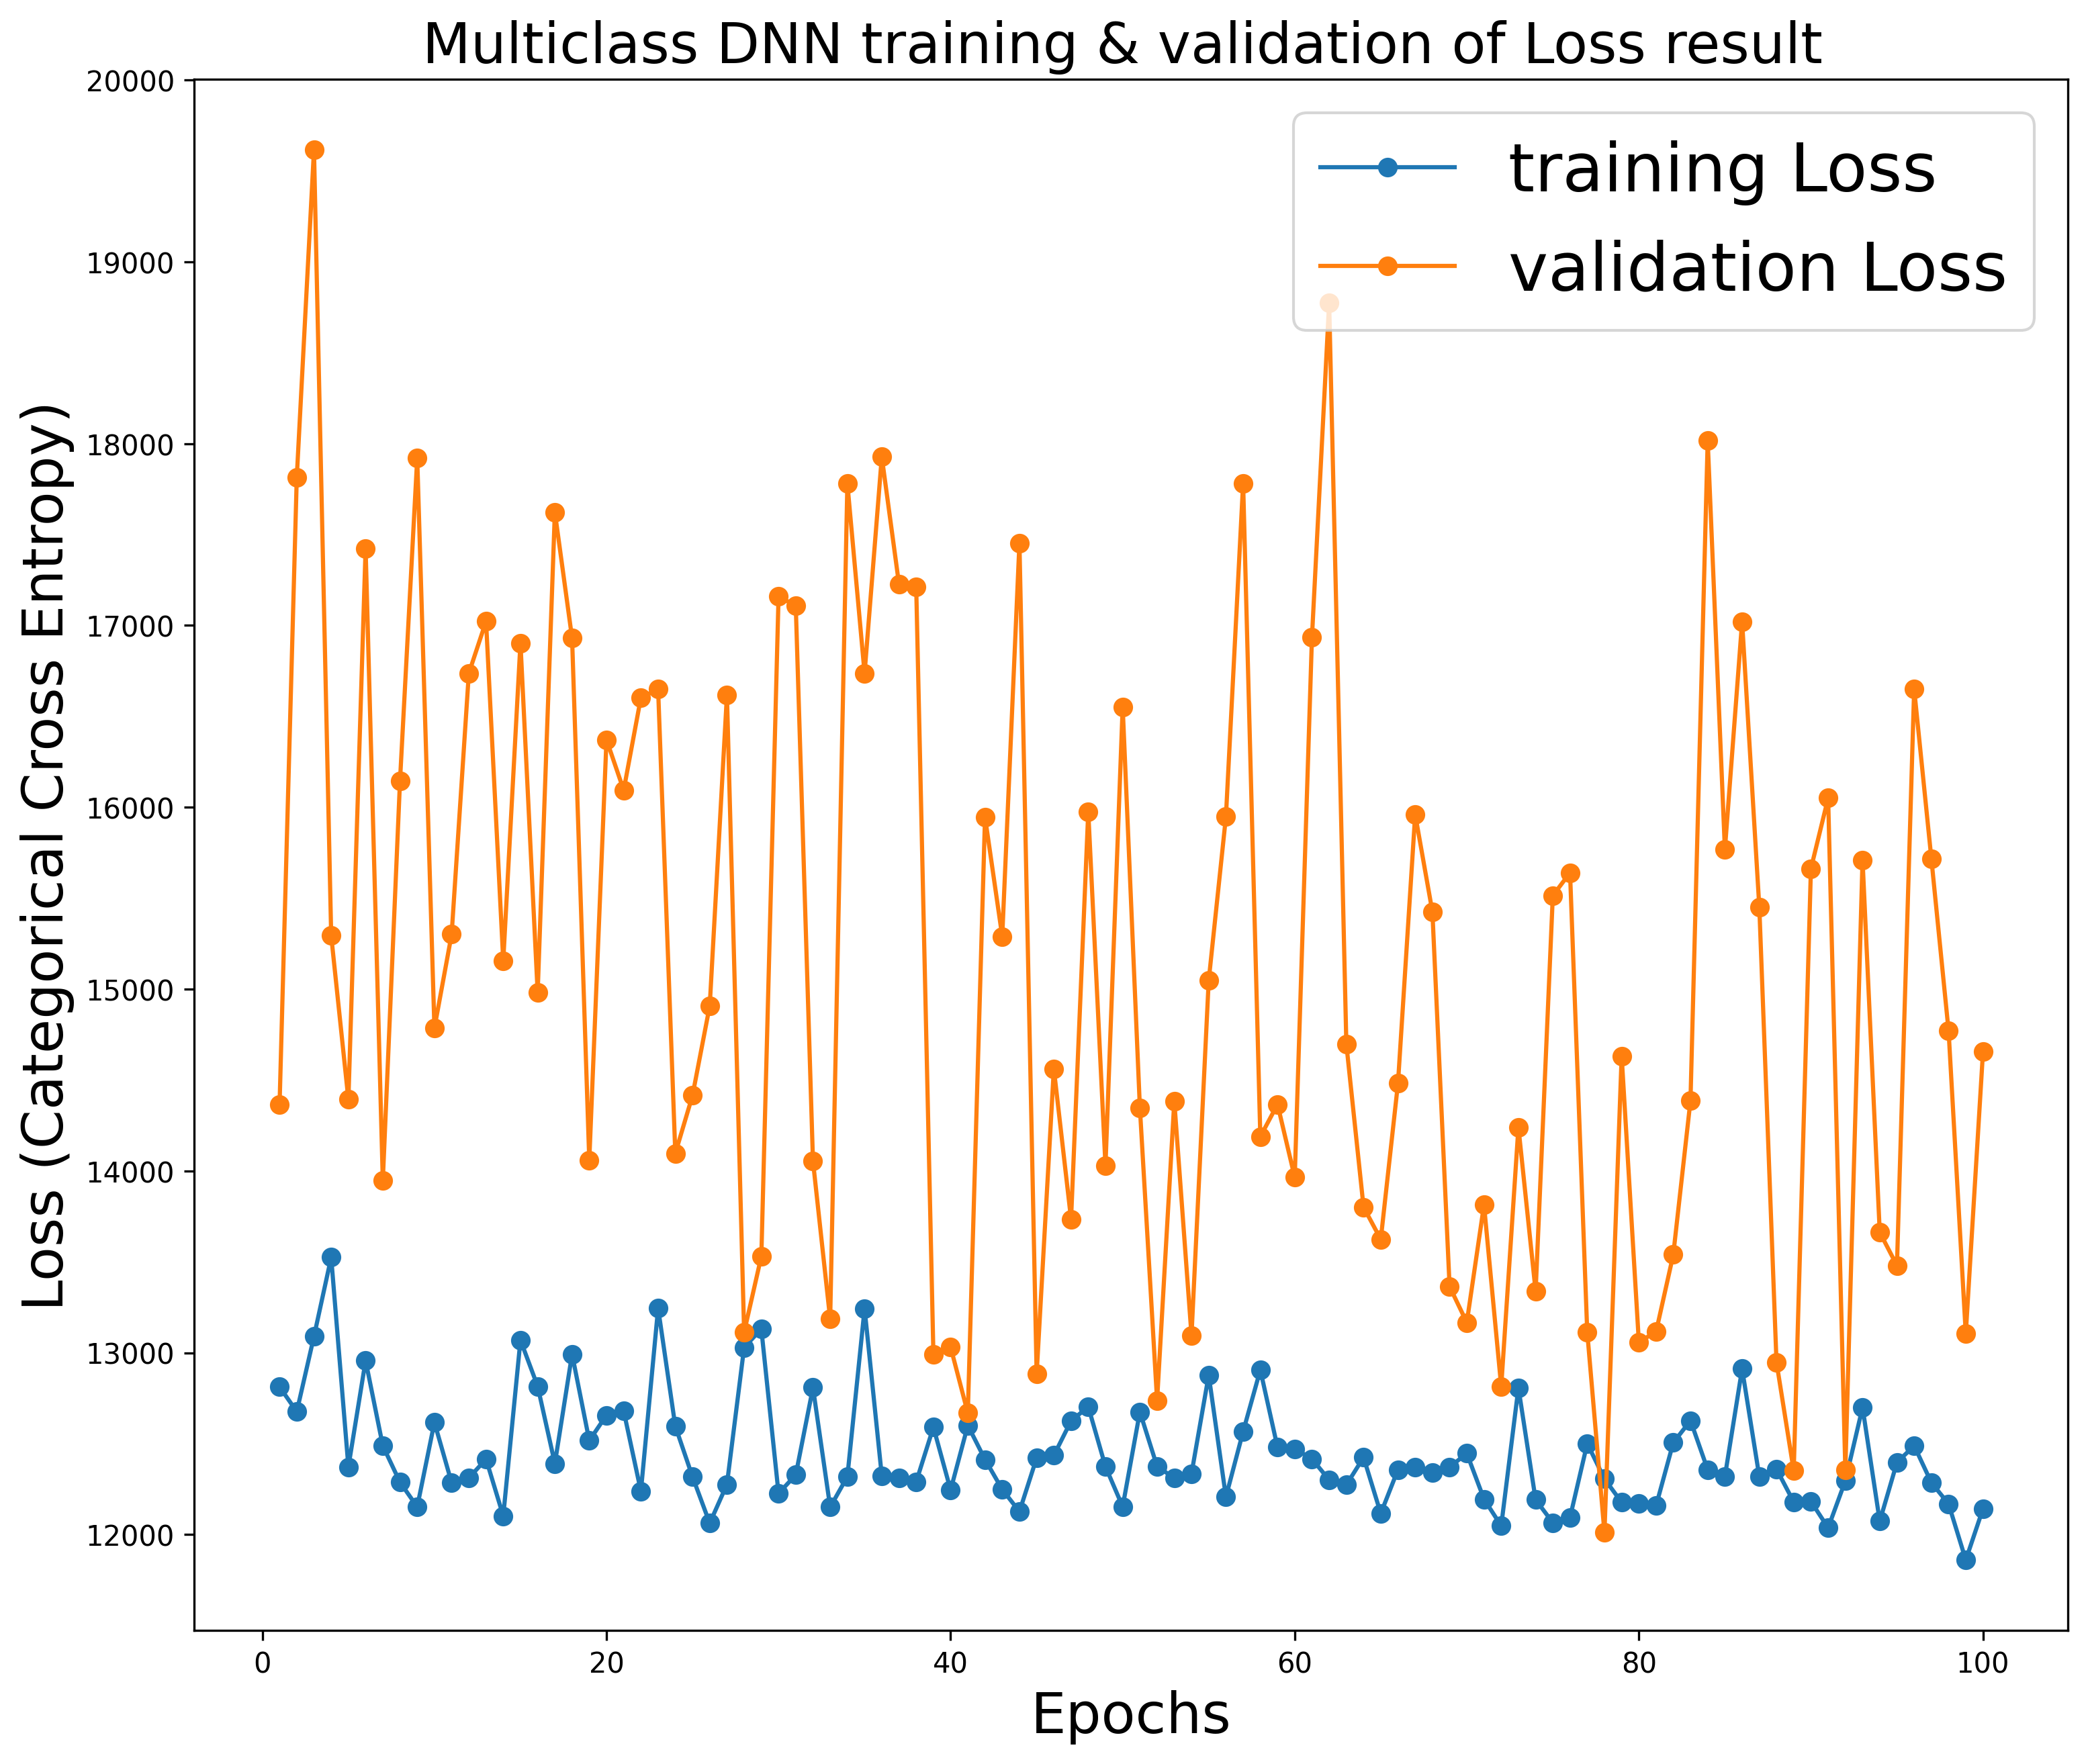

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.005,beta_1=0.9)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 6s 119ms/step - loss: 40788.2148 - MAPE: 178.0986 - val_loss: 21838.6113 - val_MAPE: 45.5005
Epoch 2/100
48/48 [==============================] - 6s 119ms/step - loss: 22045.1387 - MAPE: 63.3143 - val_loss: 18867.7363 - val_MAPE: 40.9395
Epoch 3/100
48/48 [==============================] - 6s 124ms/step - loss: 17875.2246 - MAPE: 51.0760 - val_loss: 16620.8926 - val_MAPE: 41.5055
Epoch 4/100
48/48 [==============================] - 6s 123ms/step - loss: 16476.1836 - MAPE: 47.4302 - val_loss: 19929.7031 - val_MAPE: 44.7195
Epoch 5/100
48/48 [==============================] - 6s 121ms/step - loss: 15997.9551 - MAPE: 45.5565 - val_loss: 13730.8896 - val_MAPE: 52.1721
Epoch 6/100
48/48 [==============================] - 6s 117ms/step - loss: 16221.6123 - MAPE: 46.3734 - val_loss: 21693.1289 - val_MAPE: 88.3736
Epoch 7/100
48/48 [==============================] - 6s 115ms/step - loss: 17216.4805 - MAPE: 50.0988 - val_loss: 18881.7383 - va

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

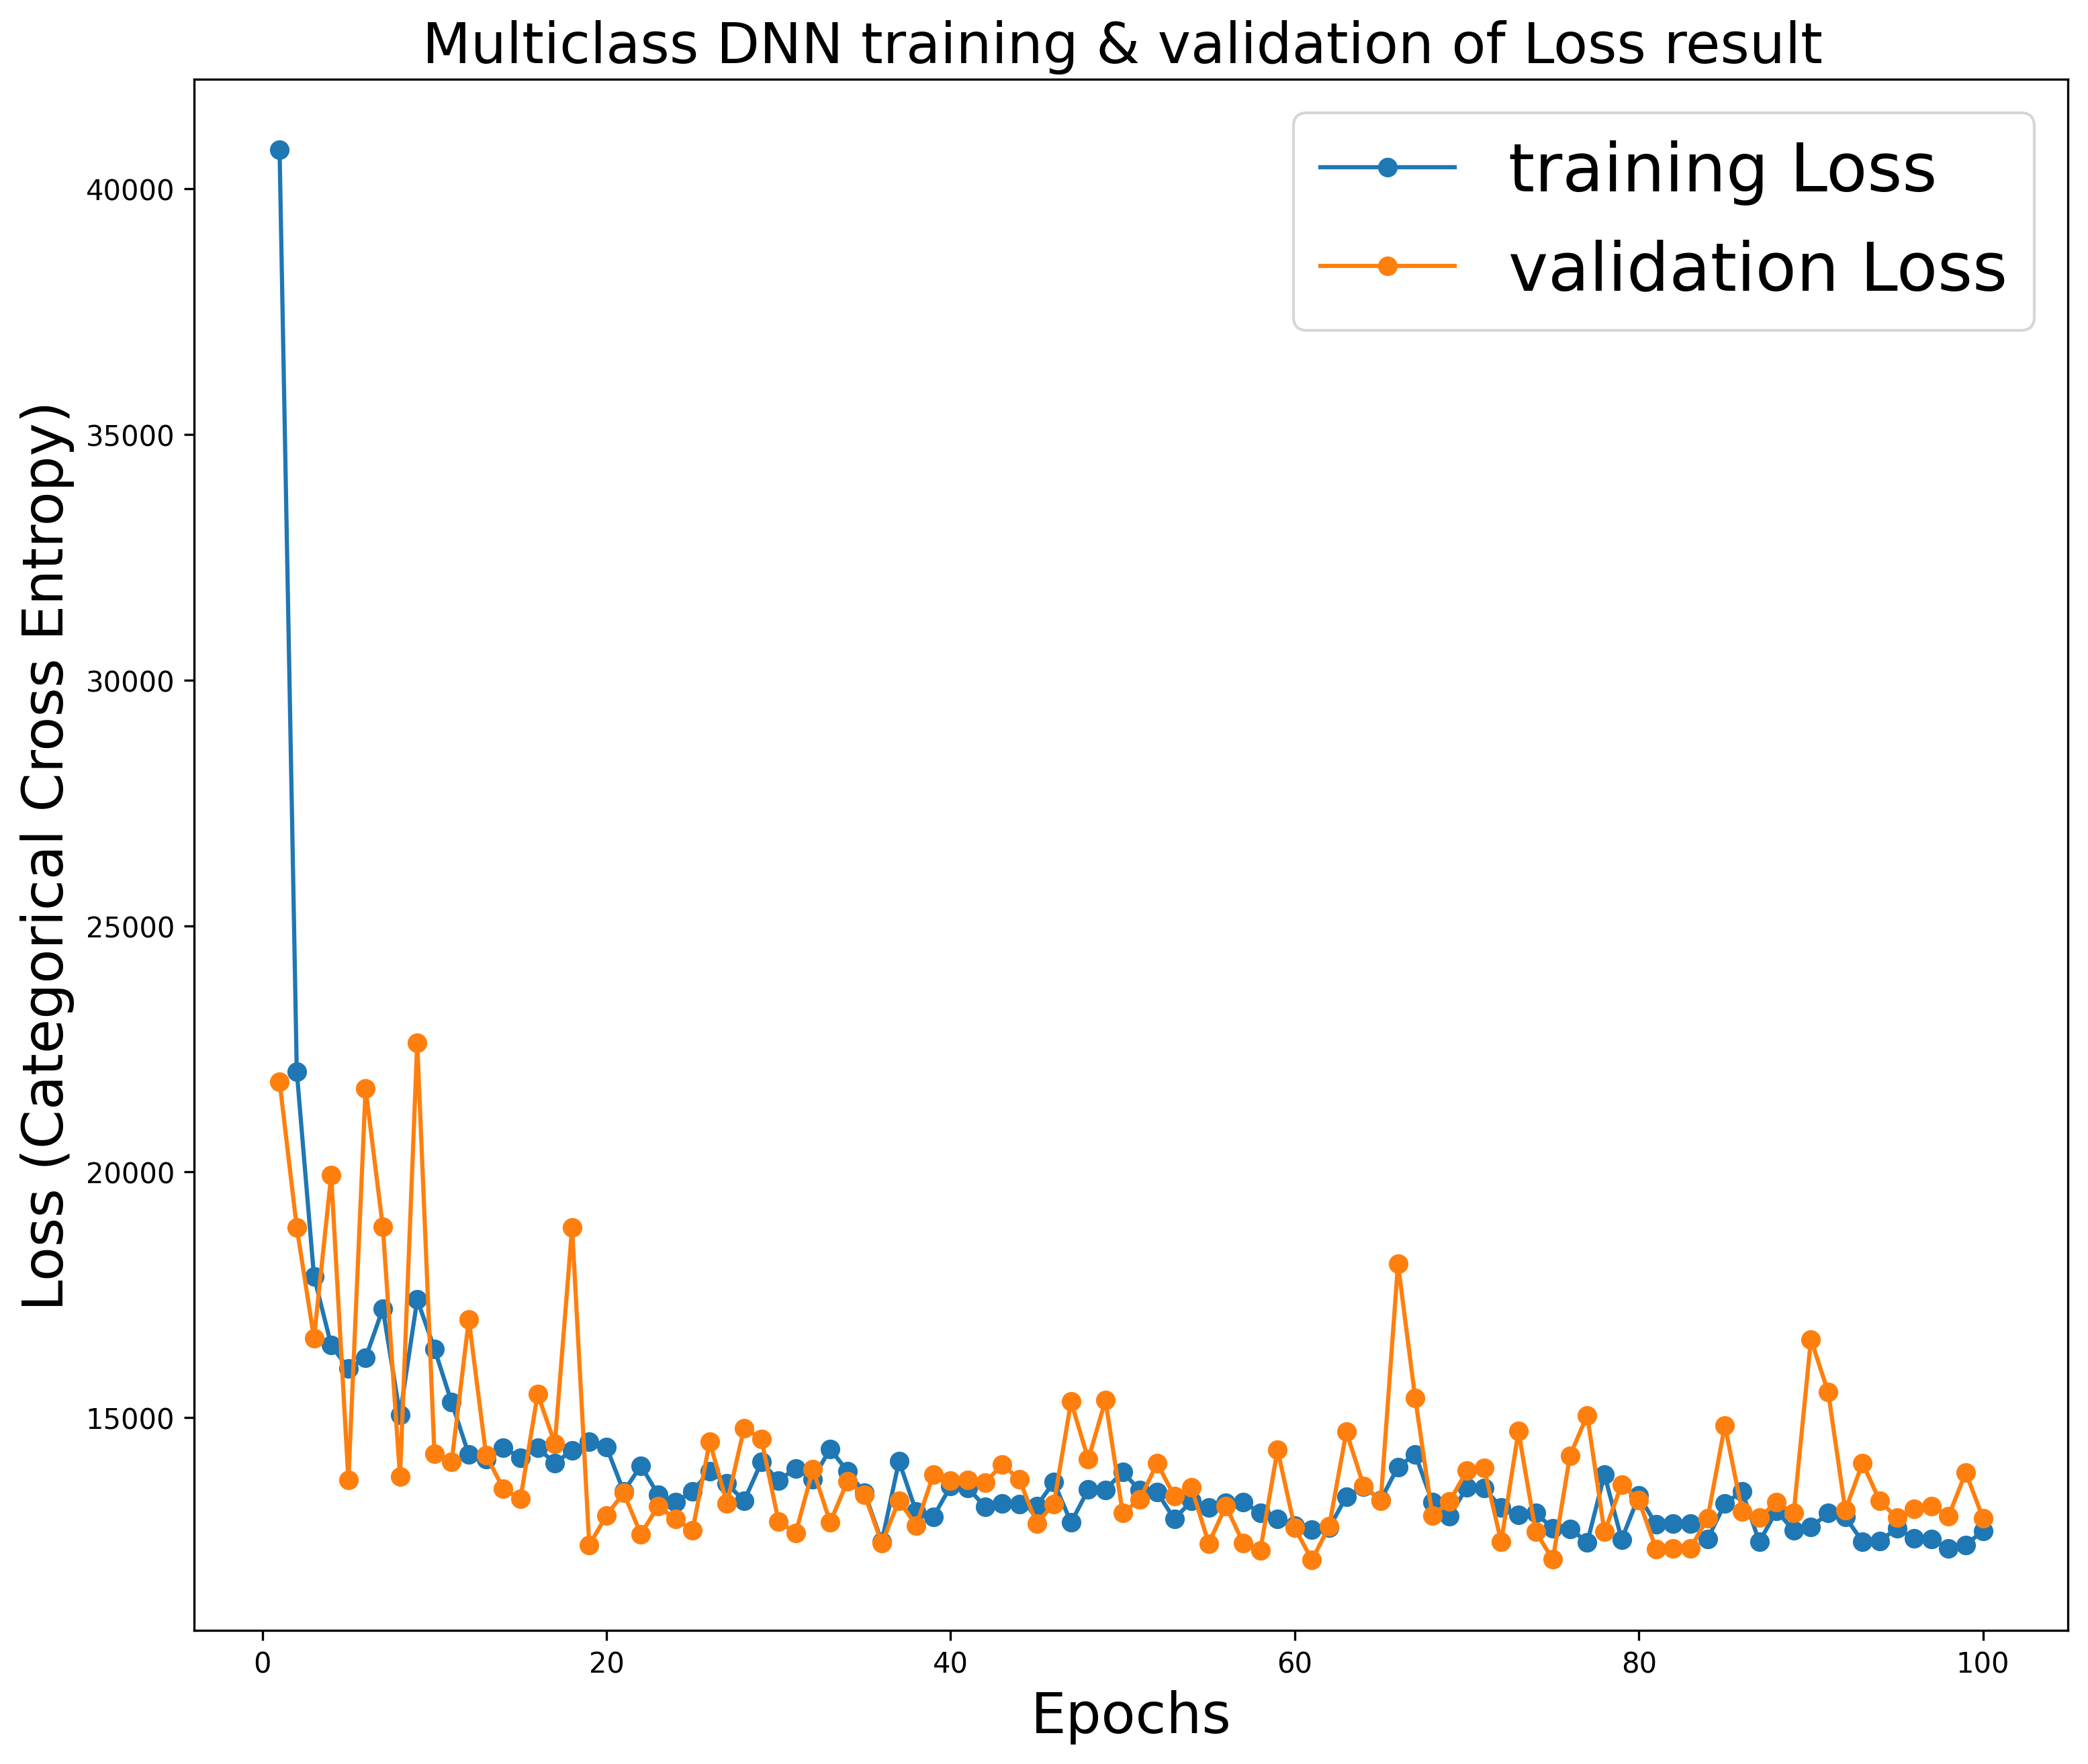

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [14]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.005,beta_1=0.7)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [18]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 5s 110ms/step - loss: 13079.5850 - MAPE: 35.8038 - val_loss: 13272.0049 - val_MAPE: 45.2494
Epoch 2/100
48/48 [==============================] - 5s 109ms/step - loss: 12883.4082 - MAPE: 36.6602 - val_loss: 12524.0430 - val_MAPE: 36.9626
Epoch 3/100
48/48 [==============================] - 5s 113ms/step - loss: 12673.9121 - MAPE: 35.0058 - val_loss: 13898.0752 - val_MAPE: 37.9559
Epoch 4/100
48/48 [==============================] - 5s 113ms/step - loss: 13008.9434 - MAPE: 35.6382 - val_loss: 13928.9180 - val_MAPE: 38.6041
Epoch 5/100
48/48 [==============================] - 5s 112ms/step - loss: 12679.7334 - MAPE: 35.8687 - val_loss: 13732.7129 - val_MAPE: 47.5481
Epoch 6/100
48/48 [==============================] - 5s 110ms/step - loss: 12468.2012 - MAPE: 34.6458 - val_loss: 15215.5918 - val_MAPE: 43.5999
Epoch 7/100
48/48 [==============================] - 5s 109ms/step - loss: 12730.8350 - MAPE: 35.2457 - val_loss: 12680.7686 - val

In [19]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

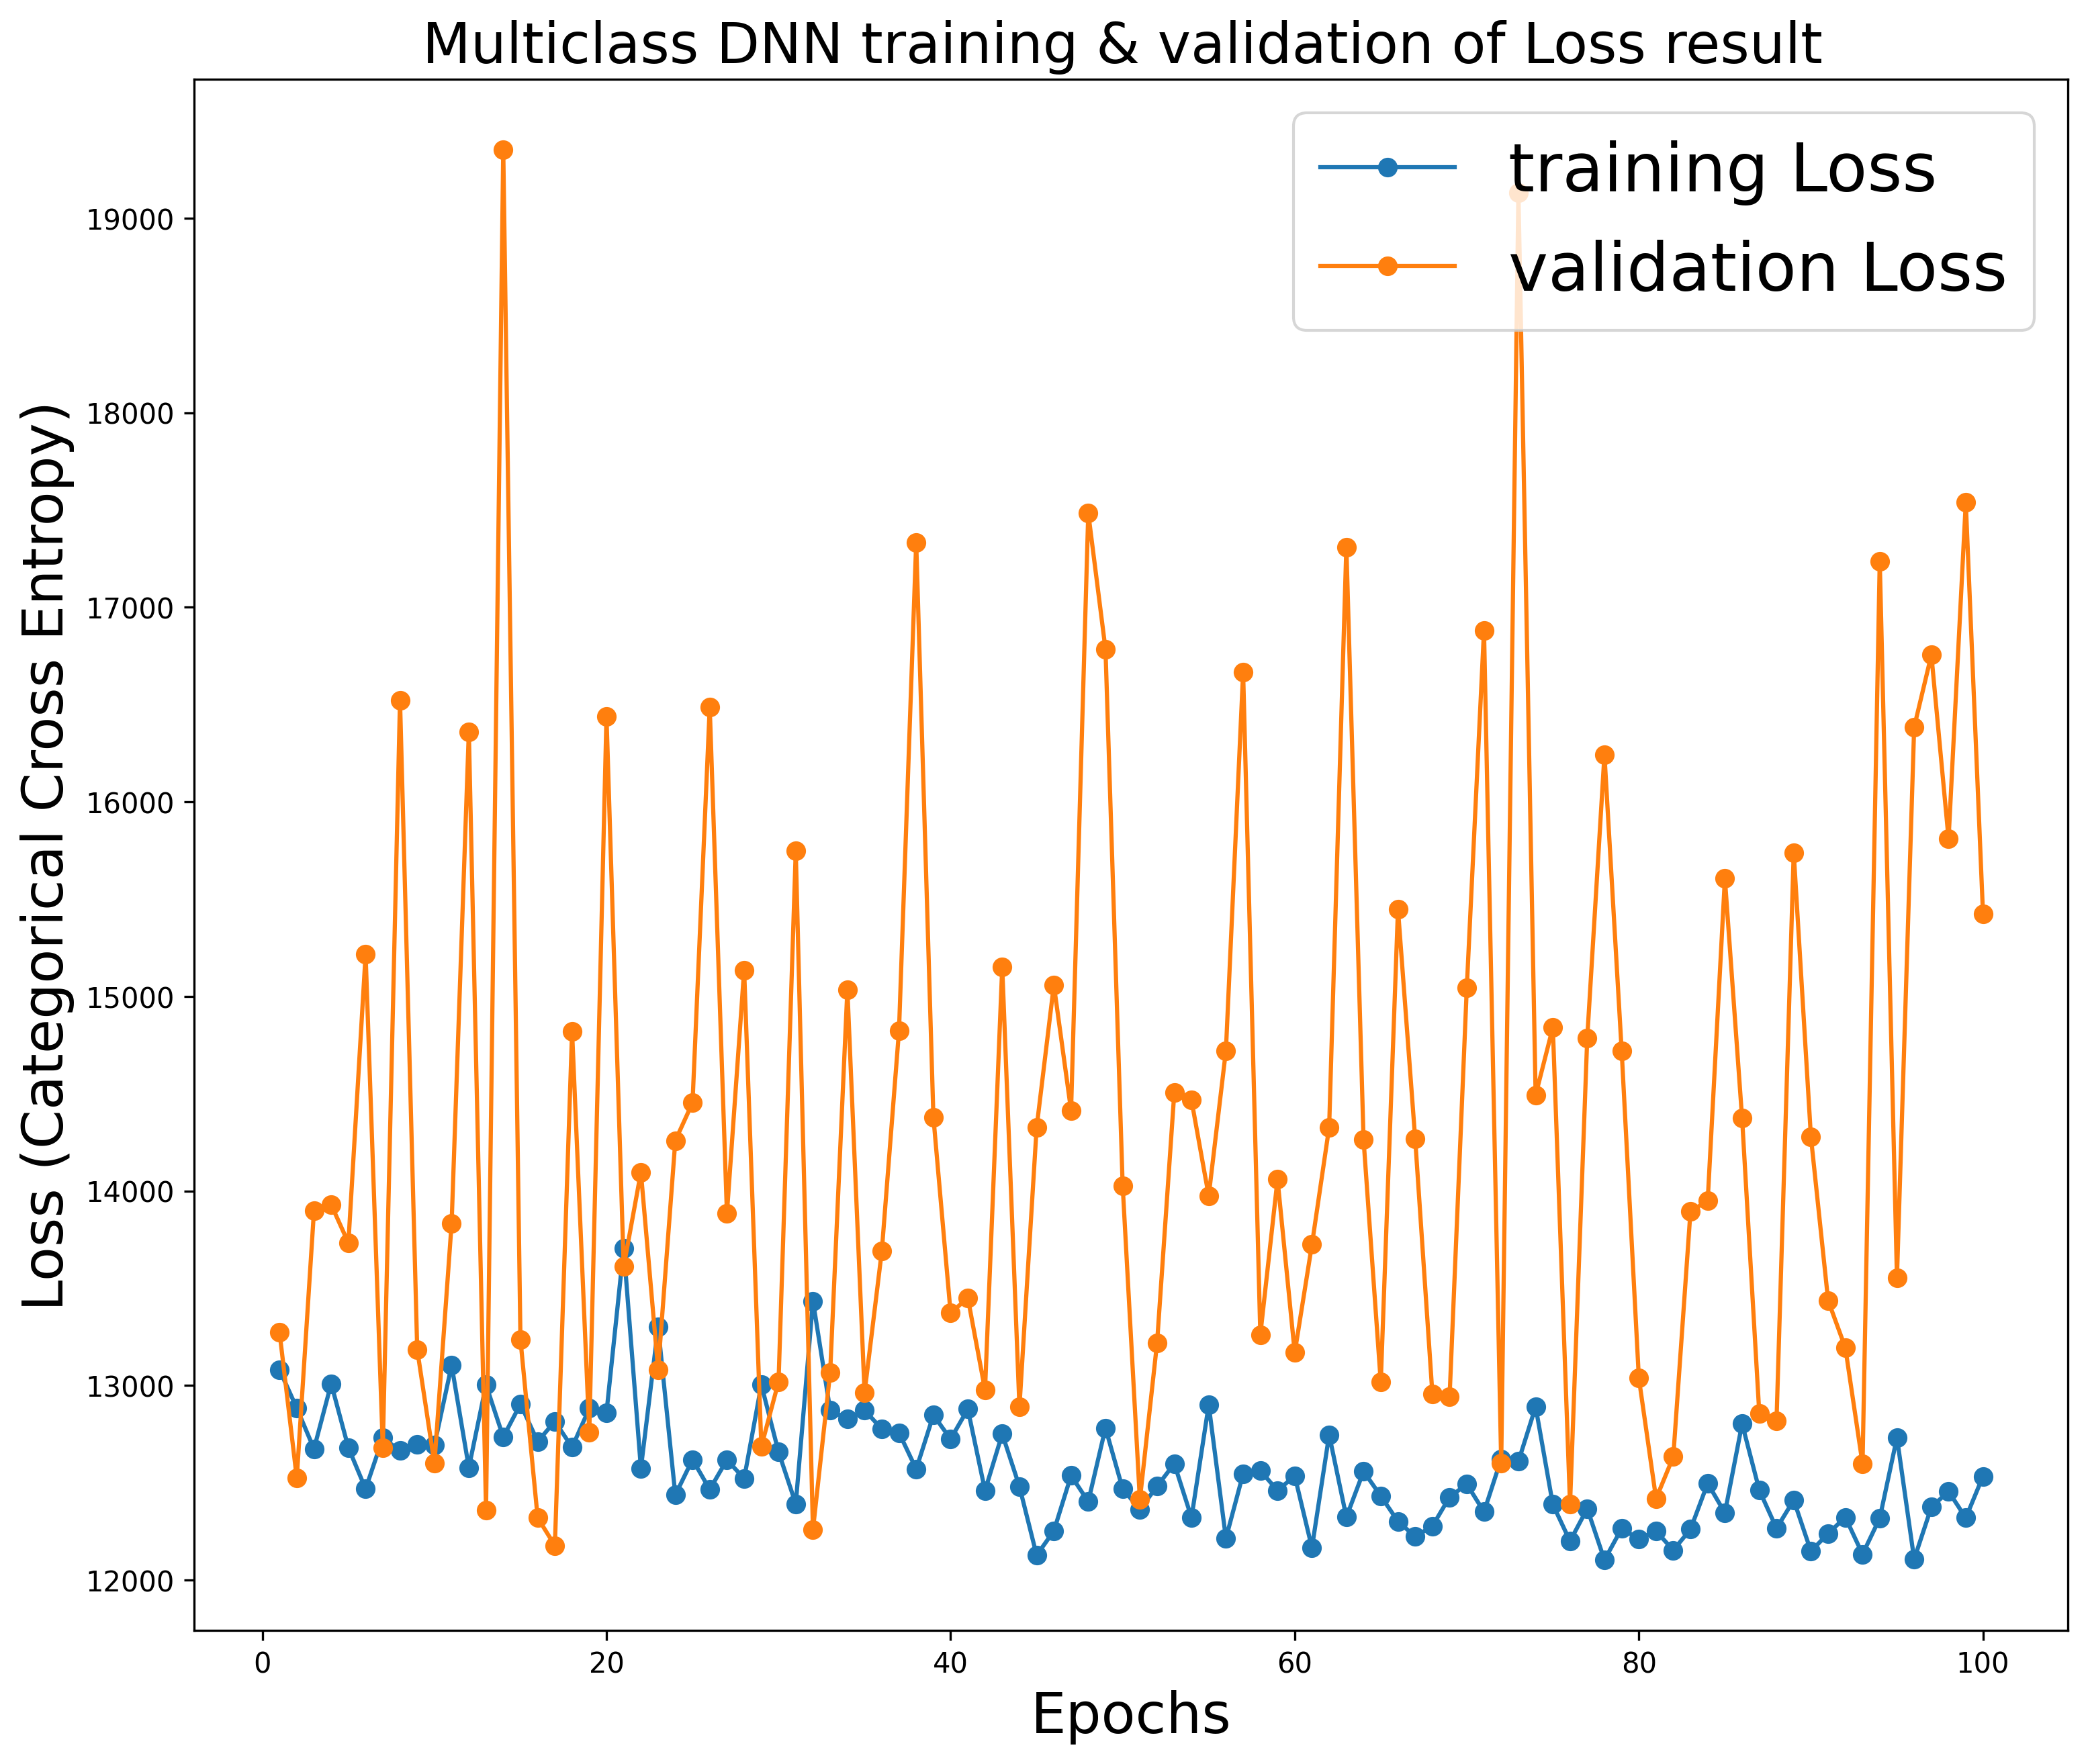

In [20]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.7)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 7s 119ms/step - loss: 25476.1426 - MAPE: 70.0968 - val_loss: 21091.6895 - val_MAPE: 42.0847
Epoch 2/100
48/48 [==============================] - 5s 114ms/step - loss: 19813.4434 - MAPE: 54.3909 - val_loss: 14709.8984 - val_MAPE: 43.4255
Epoch 3/100
48/48 [==============================] - 5s 113ms/step - loss: 16965.7754 - MAPE: 49.0385 - val_loss: 14062.5957 - val_MAPE: 46.3320
Epoch 4/100
48/48 [==============================] - 5s 112ms/step - loss: 15385.2871 - MAPE: 44.3285 - val_loss: 19291.0137 - val_MAPE: 40.7997
Epoch 5/100
48/48 [==============================] - 5s 115ms/step - loss: 17151.3438 - MAPE: 48.2765 - val_loss: 18348.6191 - val_MAPE: 38.4129
Epoch 6/100
48/48 [==============================] - 5s 112ms/step - loss: 15045.5703 - MAPE: 42.1273 - val_loss: 14185.9248 - val_MAPE: 46.0313
Epoch 7/100
48/48 [==============================] - 5s 112ms/step - loss: 17138.5684 - MAPE: 49.8043 - val_loss: 15219.5391 - val

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

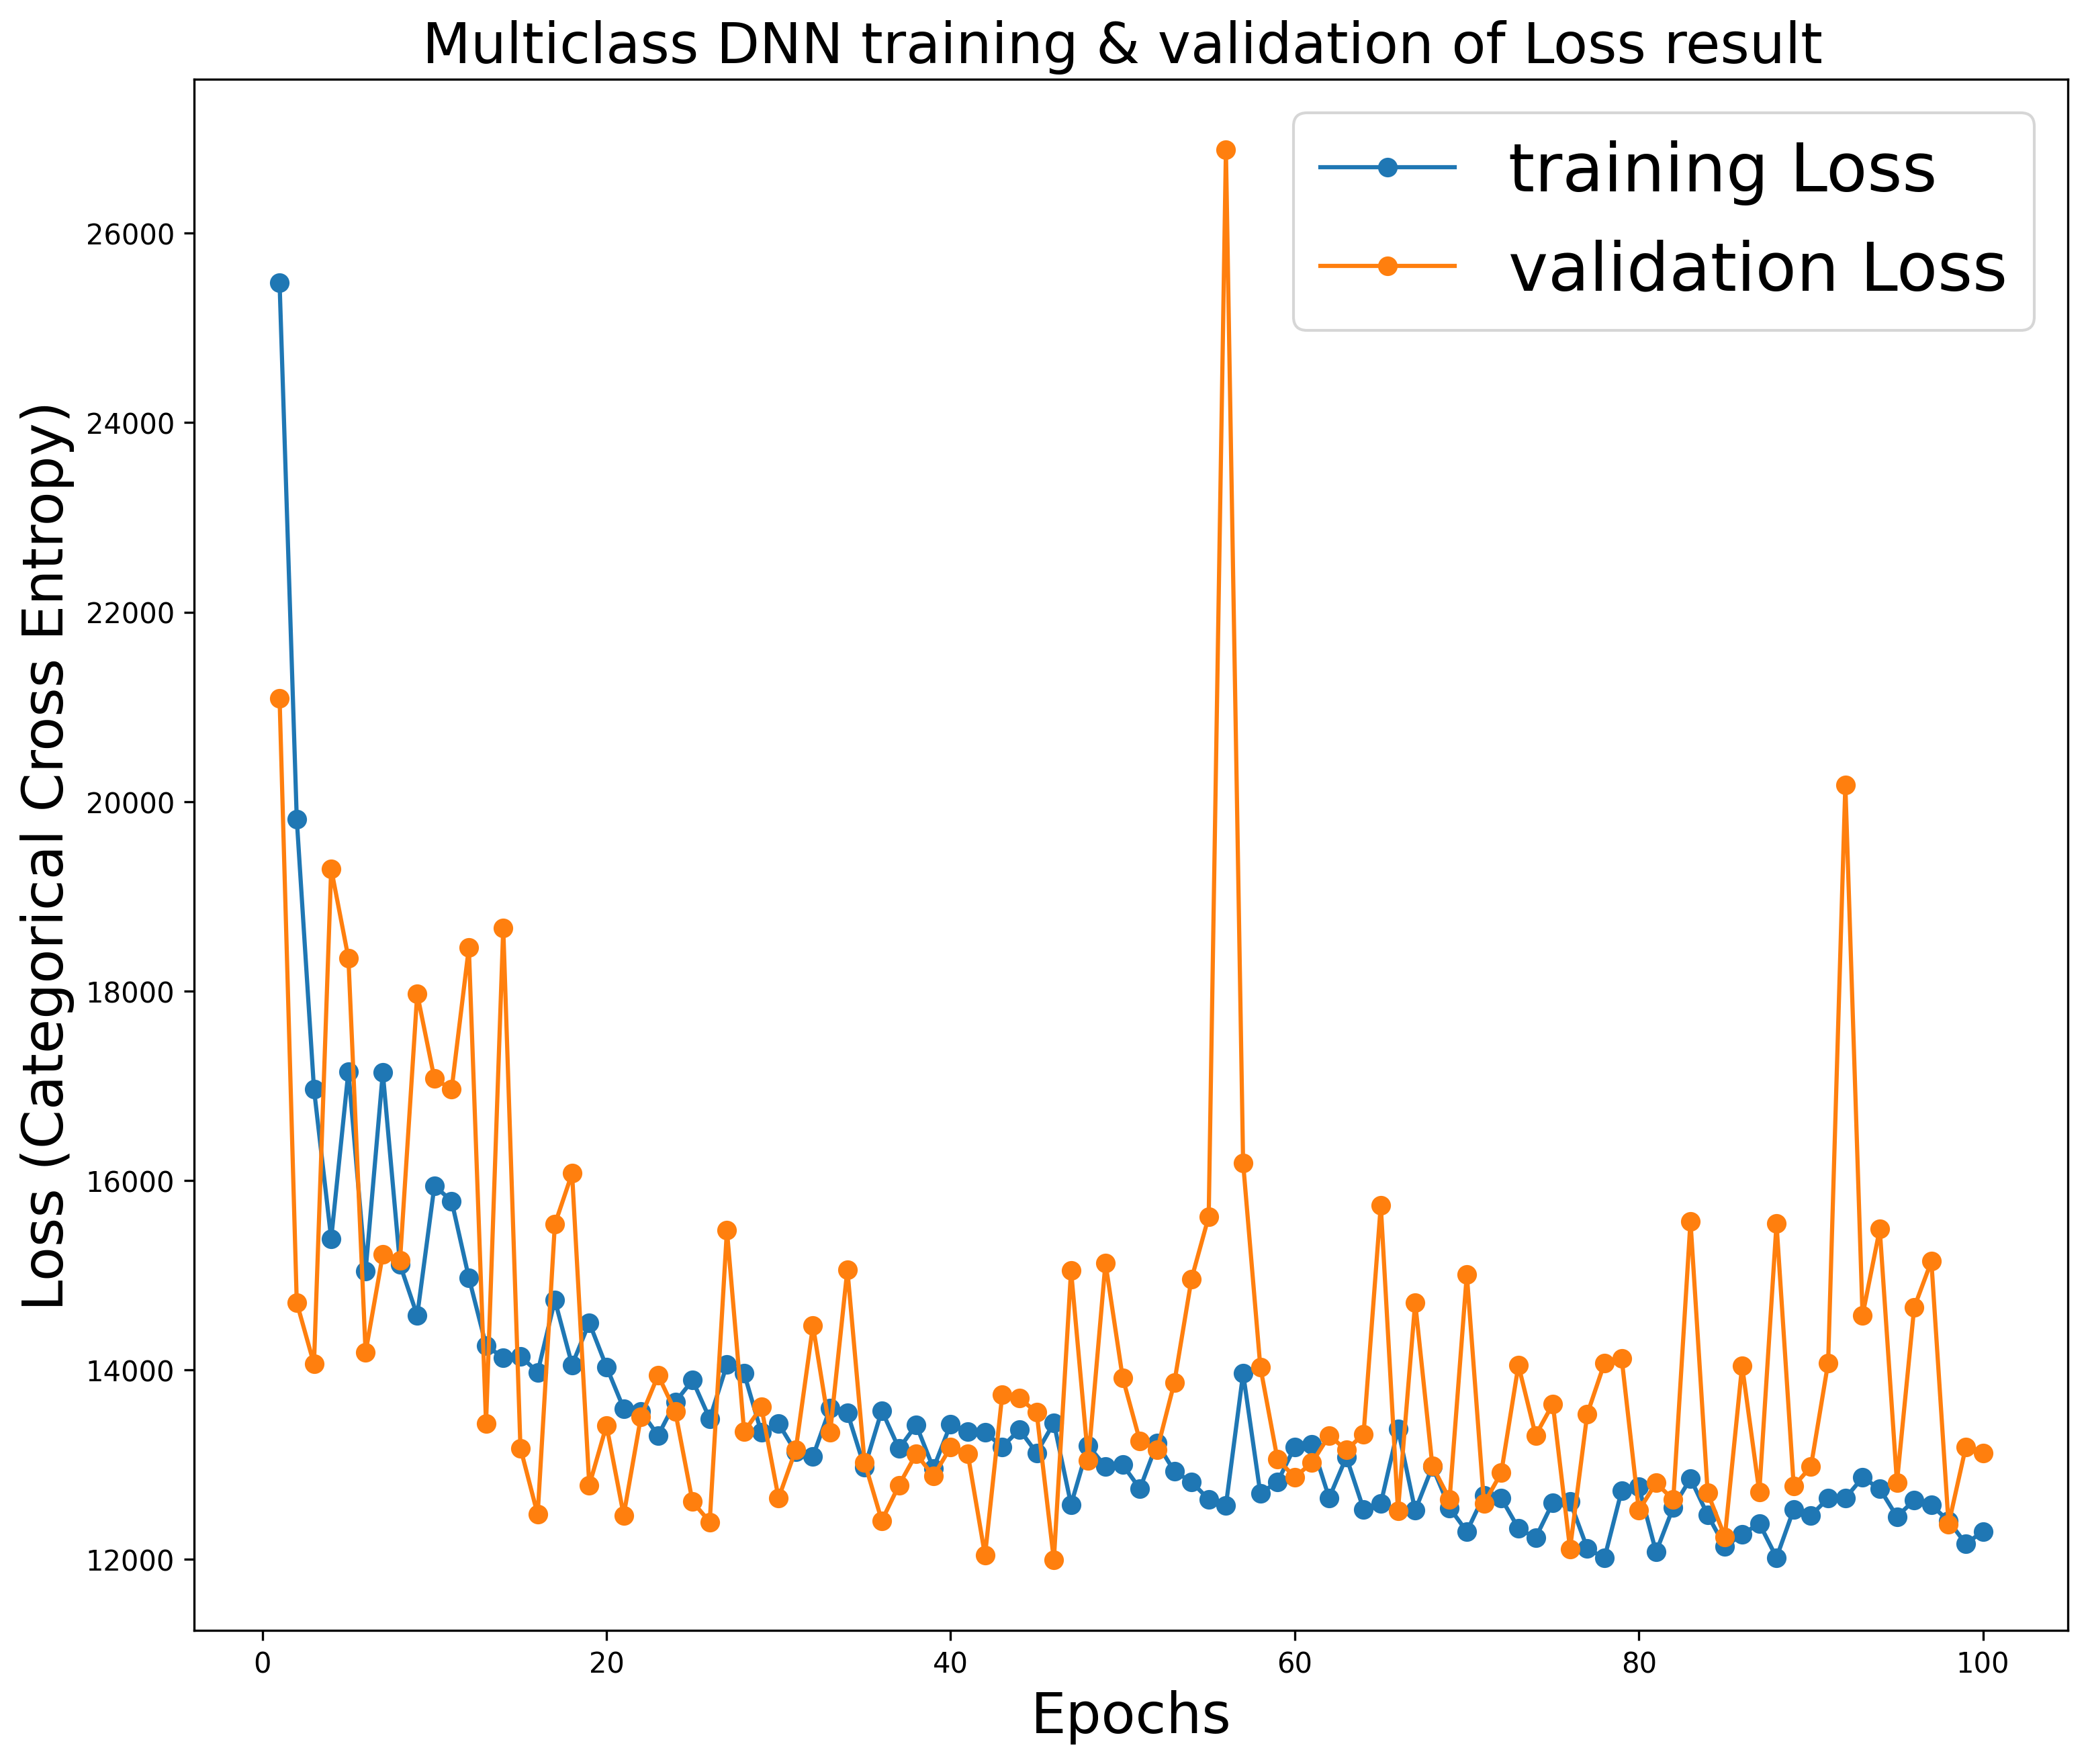

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.9)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 2s 35ms/step - loss: 27186.8906 - MAPE: 76.8444 - val_loss: 24637.2129 - val_MAPE: 45.1978
Epoch 2/100
48/48 [==============================] - 1s 30ms/step - loss: 18928.9121 - MAPE: 49.7844 - val_loss: 15480.4580 - val_MAPE: 40.8885
Epoch 3/100
48/48 [==============================] - 1s 30ms/step - loss: 15304.9014 - MAPE: 41.5278 - val_loss: 14456.8037 - val_MAPE: 44.6626
Epoch 4/100
48/48 [==============================] - 1s 30ms/step - loss: 16398.8770 - MAPE: 46.6673 - val_loss: 14731.1553 - val_MAPE: 35.5826
Epoch 5/100
48/48 [==============================] - 1s 30ms/step - loss: 15524.2822 - MAPE: 42.7556 - val_loss: 13475.1982 - val_MAPE: 35.4521
Epoch 6/100
48/48 [==============================] - 1s 31ms/step - loss: 15042.4570 - MAPE: 41.1914 - val_loss: 14197.4541 - val_MAPE: 34.8735
Epoch 7/100
48/48 [==============================] - 2s 32ms/step - loss: 15528.5771 - MAPE: 43.0019 - val_loss: 14968.0381 - val_MAPE: 

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

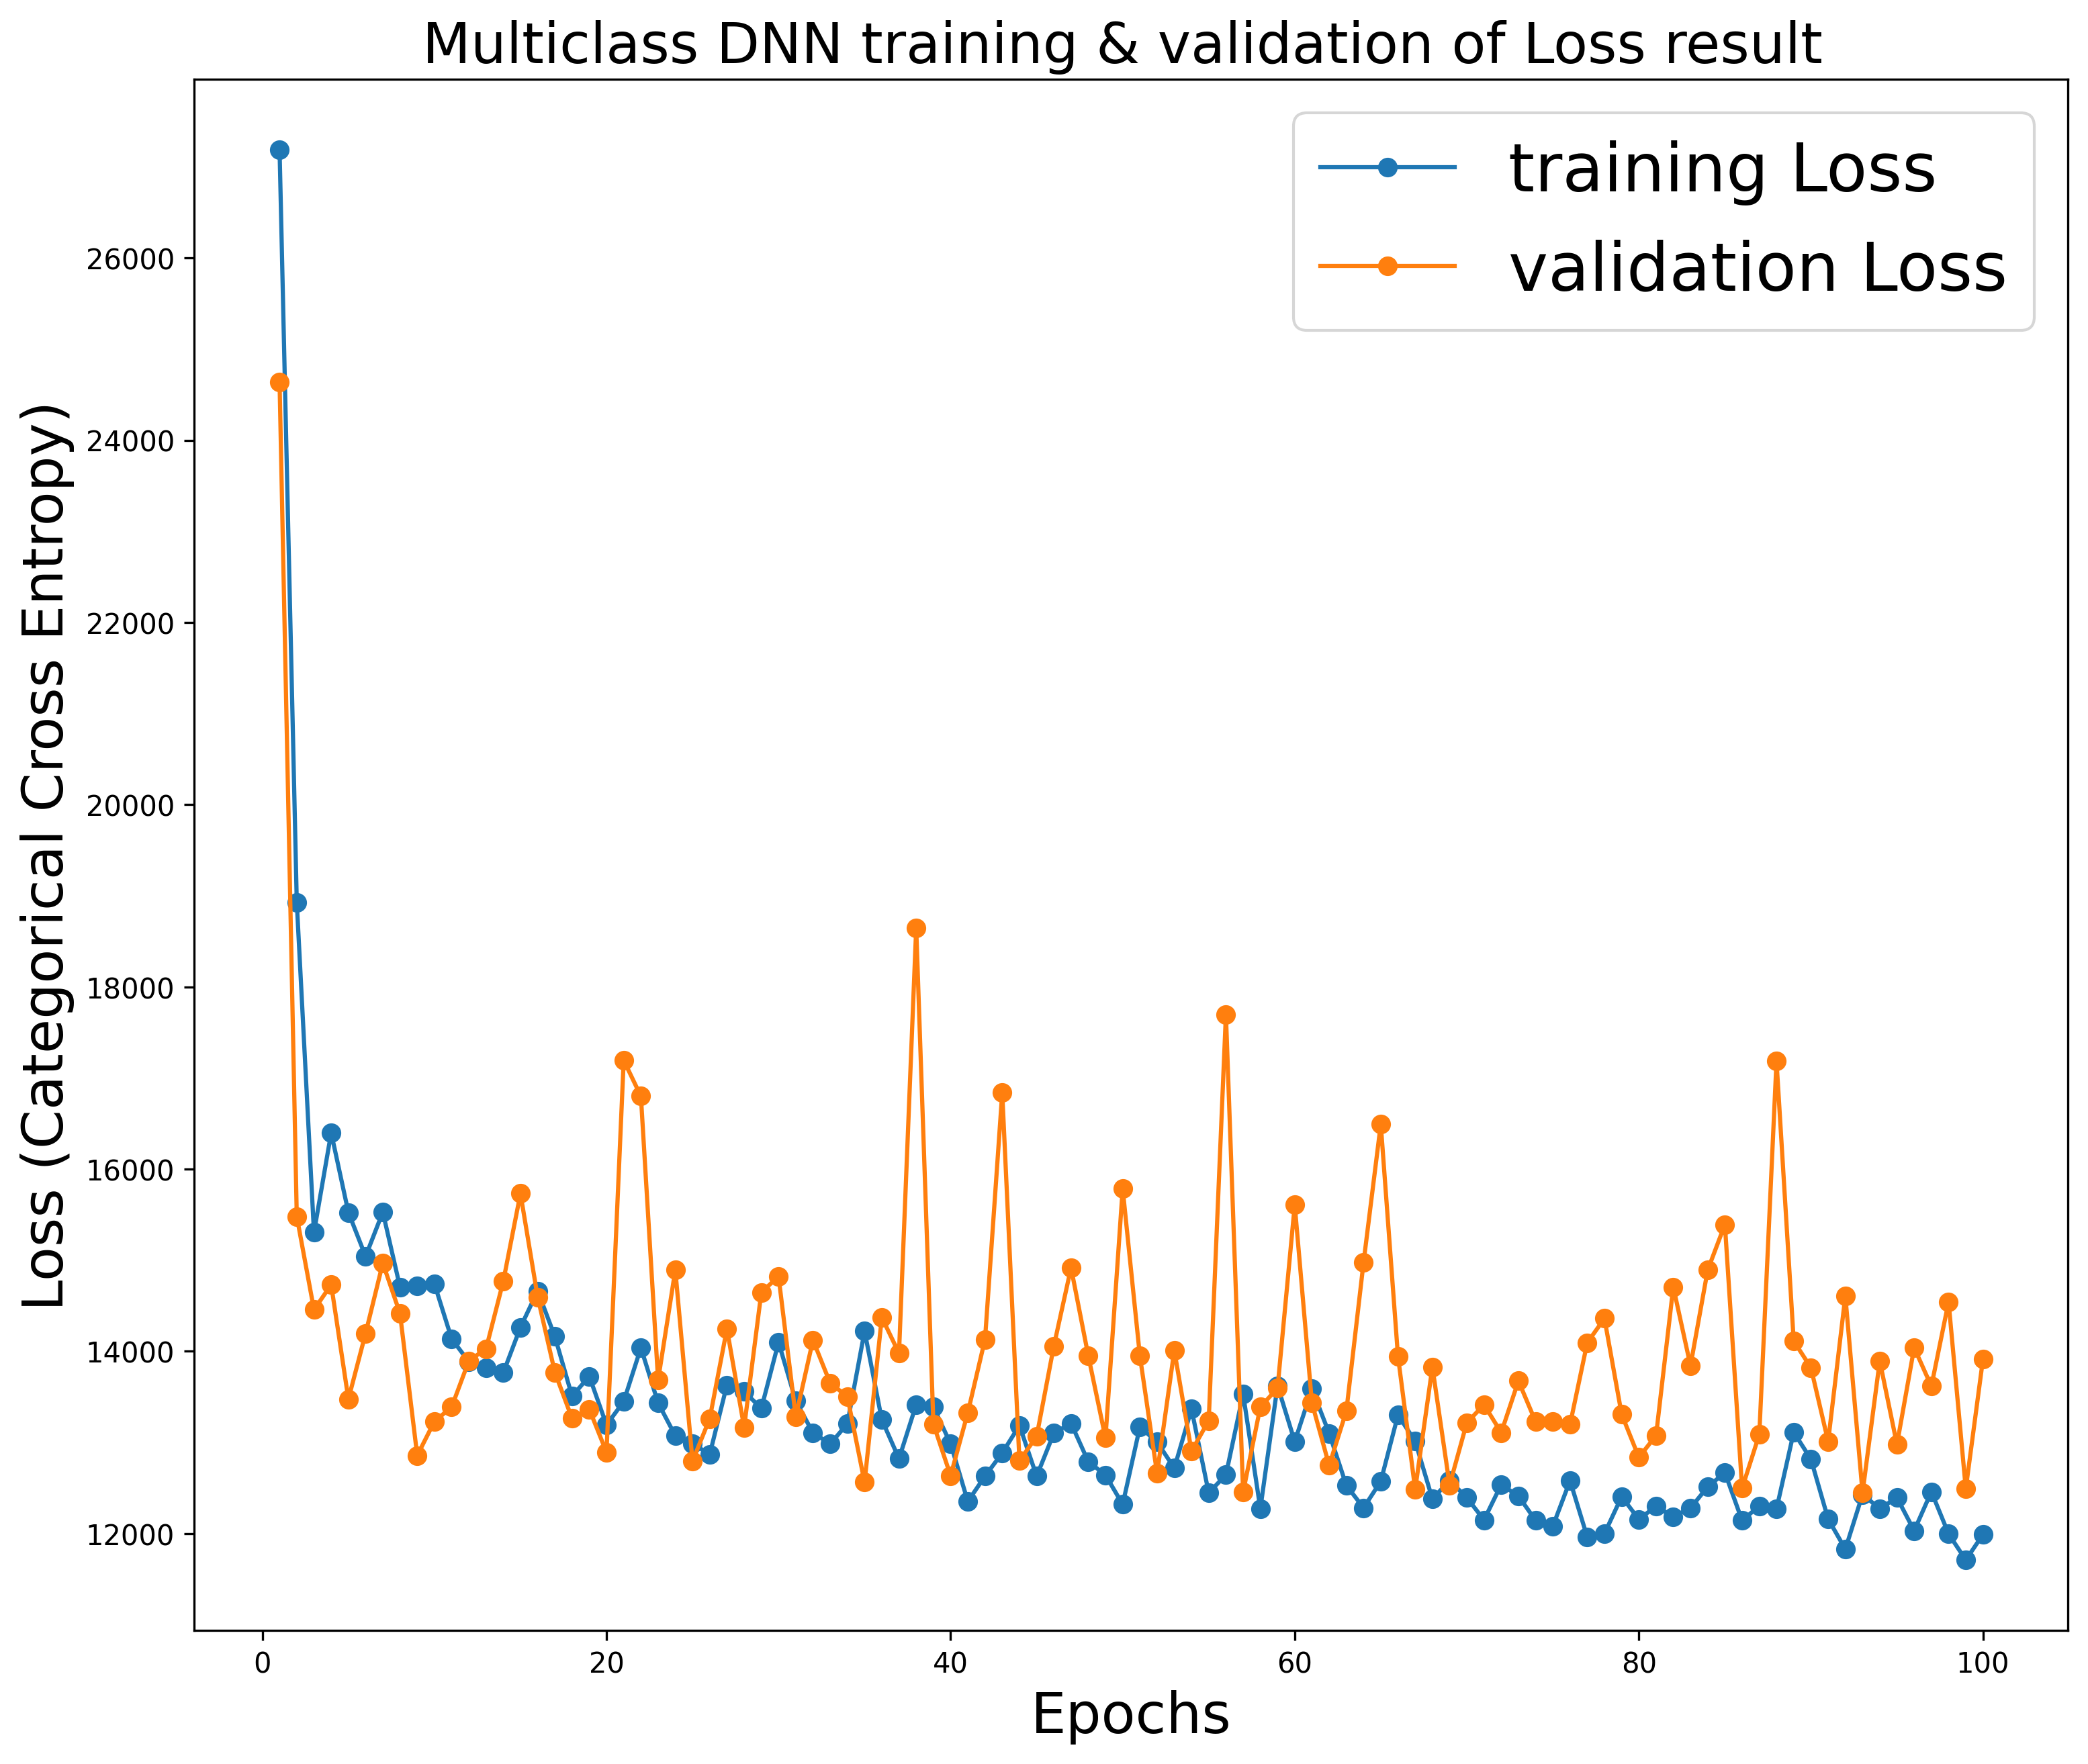

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.5)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
 1/48 [..............................] - ETA: 7:01 - loss: 35029.5312 - MAPE: 96.4297

KeyboardInterrupt: ignored

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.005,beta_1=0.5)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 9s 115ms/step - loss: 87803.8594 - MAPE: 506.3259 - val_loss: 25706.5703 - val_MAPE: 66.4254
Epoch 2/100
48/48 [==============================] - 5s 113ms/step - loss: 24158.0156 - MAPE: 67.8951 - val_loss: 19222.3066 - val_MAPE: 52.3864
Epoch 3/100
48/48 [==============================] - 5s 114ms/step - loss: 29776.2852 - MAPE: 90.0156 - val_loss: 30448.0430 - val_MAPE: 54.7146
Epoch 4/100
48/48 [==============================] - 5s 113ms/step - loss: 29693.7266 - MAPE: 97.8736 - val_loss: 30774.0430 - val_MAPE: 109.5057
Epoch 5/100
48/48 [==============================] - 5s 111ms/step - loss: 26155.1348 - MAPE: 73.2110 - val_loss: 25709.6895 - val_MAPE: 51.3138
Epoch 6/100
48/48 [==============================] - 5s 113ms/step - loss: 25710.5234 - MAPE: 75.0397 - val_loss: 28310.6680 - val_MAPE: 84.4308
Epoch 7/100
48/48 [==============================] - 5s 115ms/step - loss: 27563.3828 - MAPE: 85.8409 - val_loss: 30046.2656 - v

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'MAPE', 'val_loss', 'val_MAPE'])

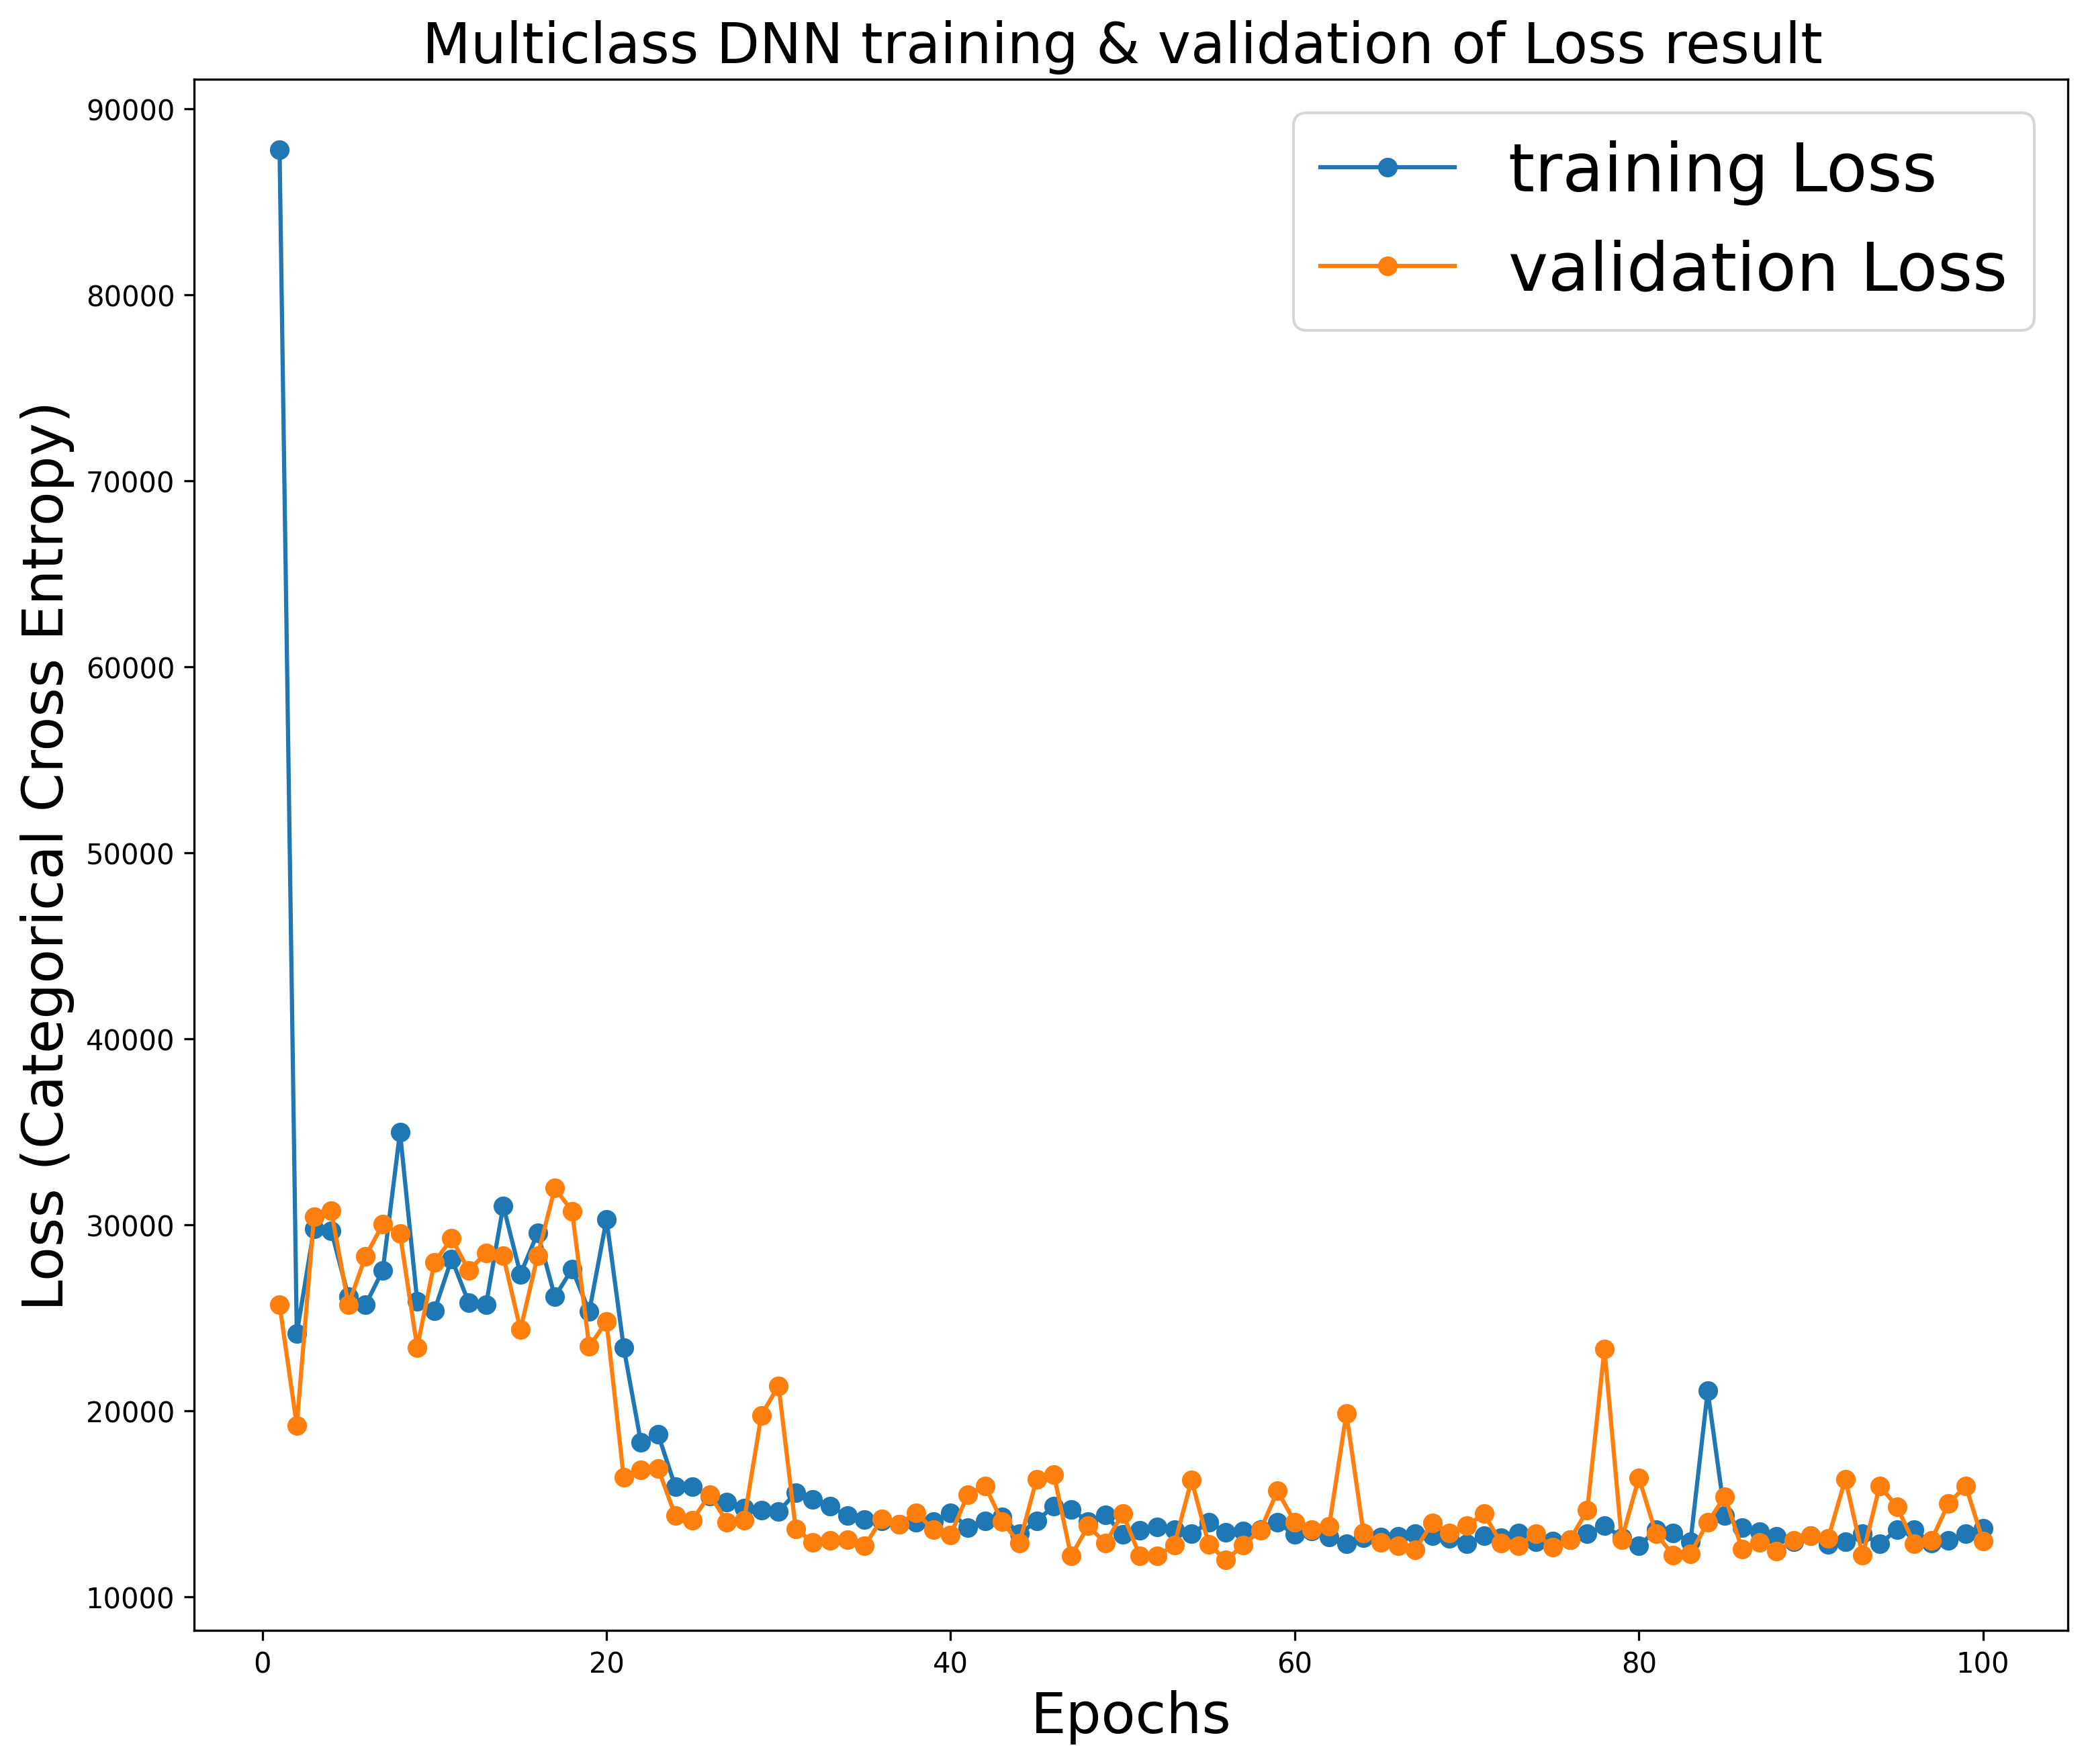

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,24)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2)) #0.2 drop 

# 6.5 Add 5 more dense layers
dense_generator(model,5,768)


# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output  layer
model.add(Dense(units=12, activation='linear'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.005,beta_1=0.9)
model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE']) #category loss
# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 96)                4704      
                                                                 
 dense_3 (Dense)             (None, 192)               18624     
                                                                 
 dense_4 (Dense)             (None, 384)               74112     
                                                                 
 dense_5 (Dense)             (None, 768)               295680    
                                                                 
 dropout (Dropout)           (None, 768)               0

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=44)


history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
48/48 [==============================] - 7s 120ms/step - loss: 30198.4473 - MAPE: 101.6532 - val_loss: 21152.1230 - val_MAPE: 41.8819
Epoch 2/100
48/48 [==============================] - 6s 118ms/step - loss: 19237.9512 - MAPE: 52.3955 - val_loss: 14271.3496 - val_MAPE: 38.3991
Epoch 3/100
48/48 [==============================] - 6s 119ms/step - loss: 17233.6836 - MAPE: 49.9651 - val_loss: 17411.3262 - val_MAPE: 58.0759
Epoch 4/100
48/48 [==============================] - 6s 117ms/step - loss: 19444.1719 - MAPE: 57.3566 - val_loss: 16268.5127 - val_MAPE: 38.1253
Epoch 5/100
48/48 [==============================] - 6s 117ms/step - loss: 15046.7969 - MAPE: 40.5186 - val_loss: 13267.1172 - val_MAPE: 32.9393
Epoch 6/100
48/48 [==============================] - 6s 118ms/step - loss: 14956.2227 - MAPE: 40.6319 - val_loss: 13927.9971 - val_MAPE: 54.5691
Epoch 7/100
48/48 [==============================] - 6s 115ms/step - loss: 16340.3350 - MAPE: 45.6504 - val_loss: 17272.4863 - va

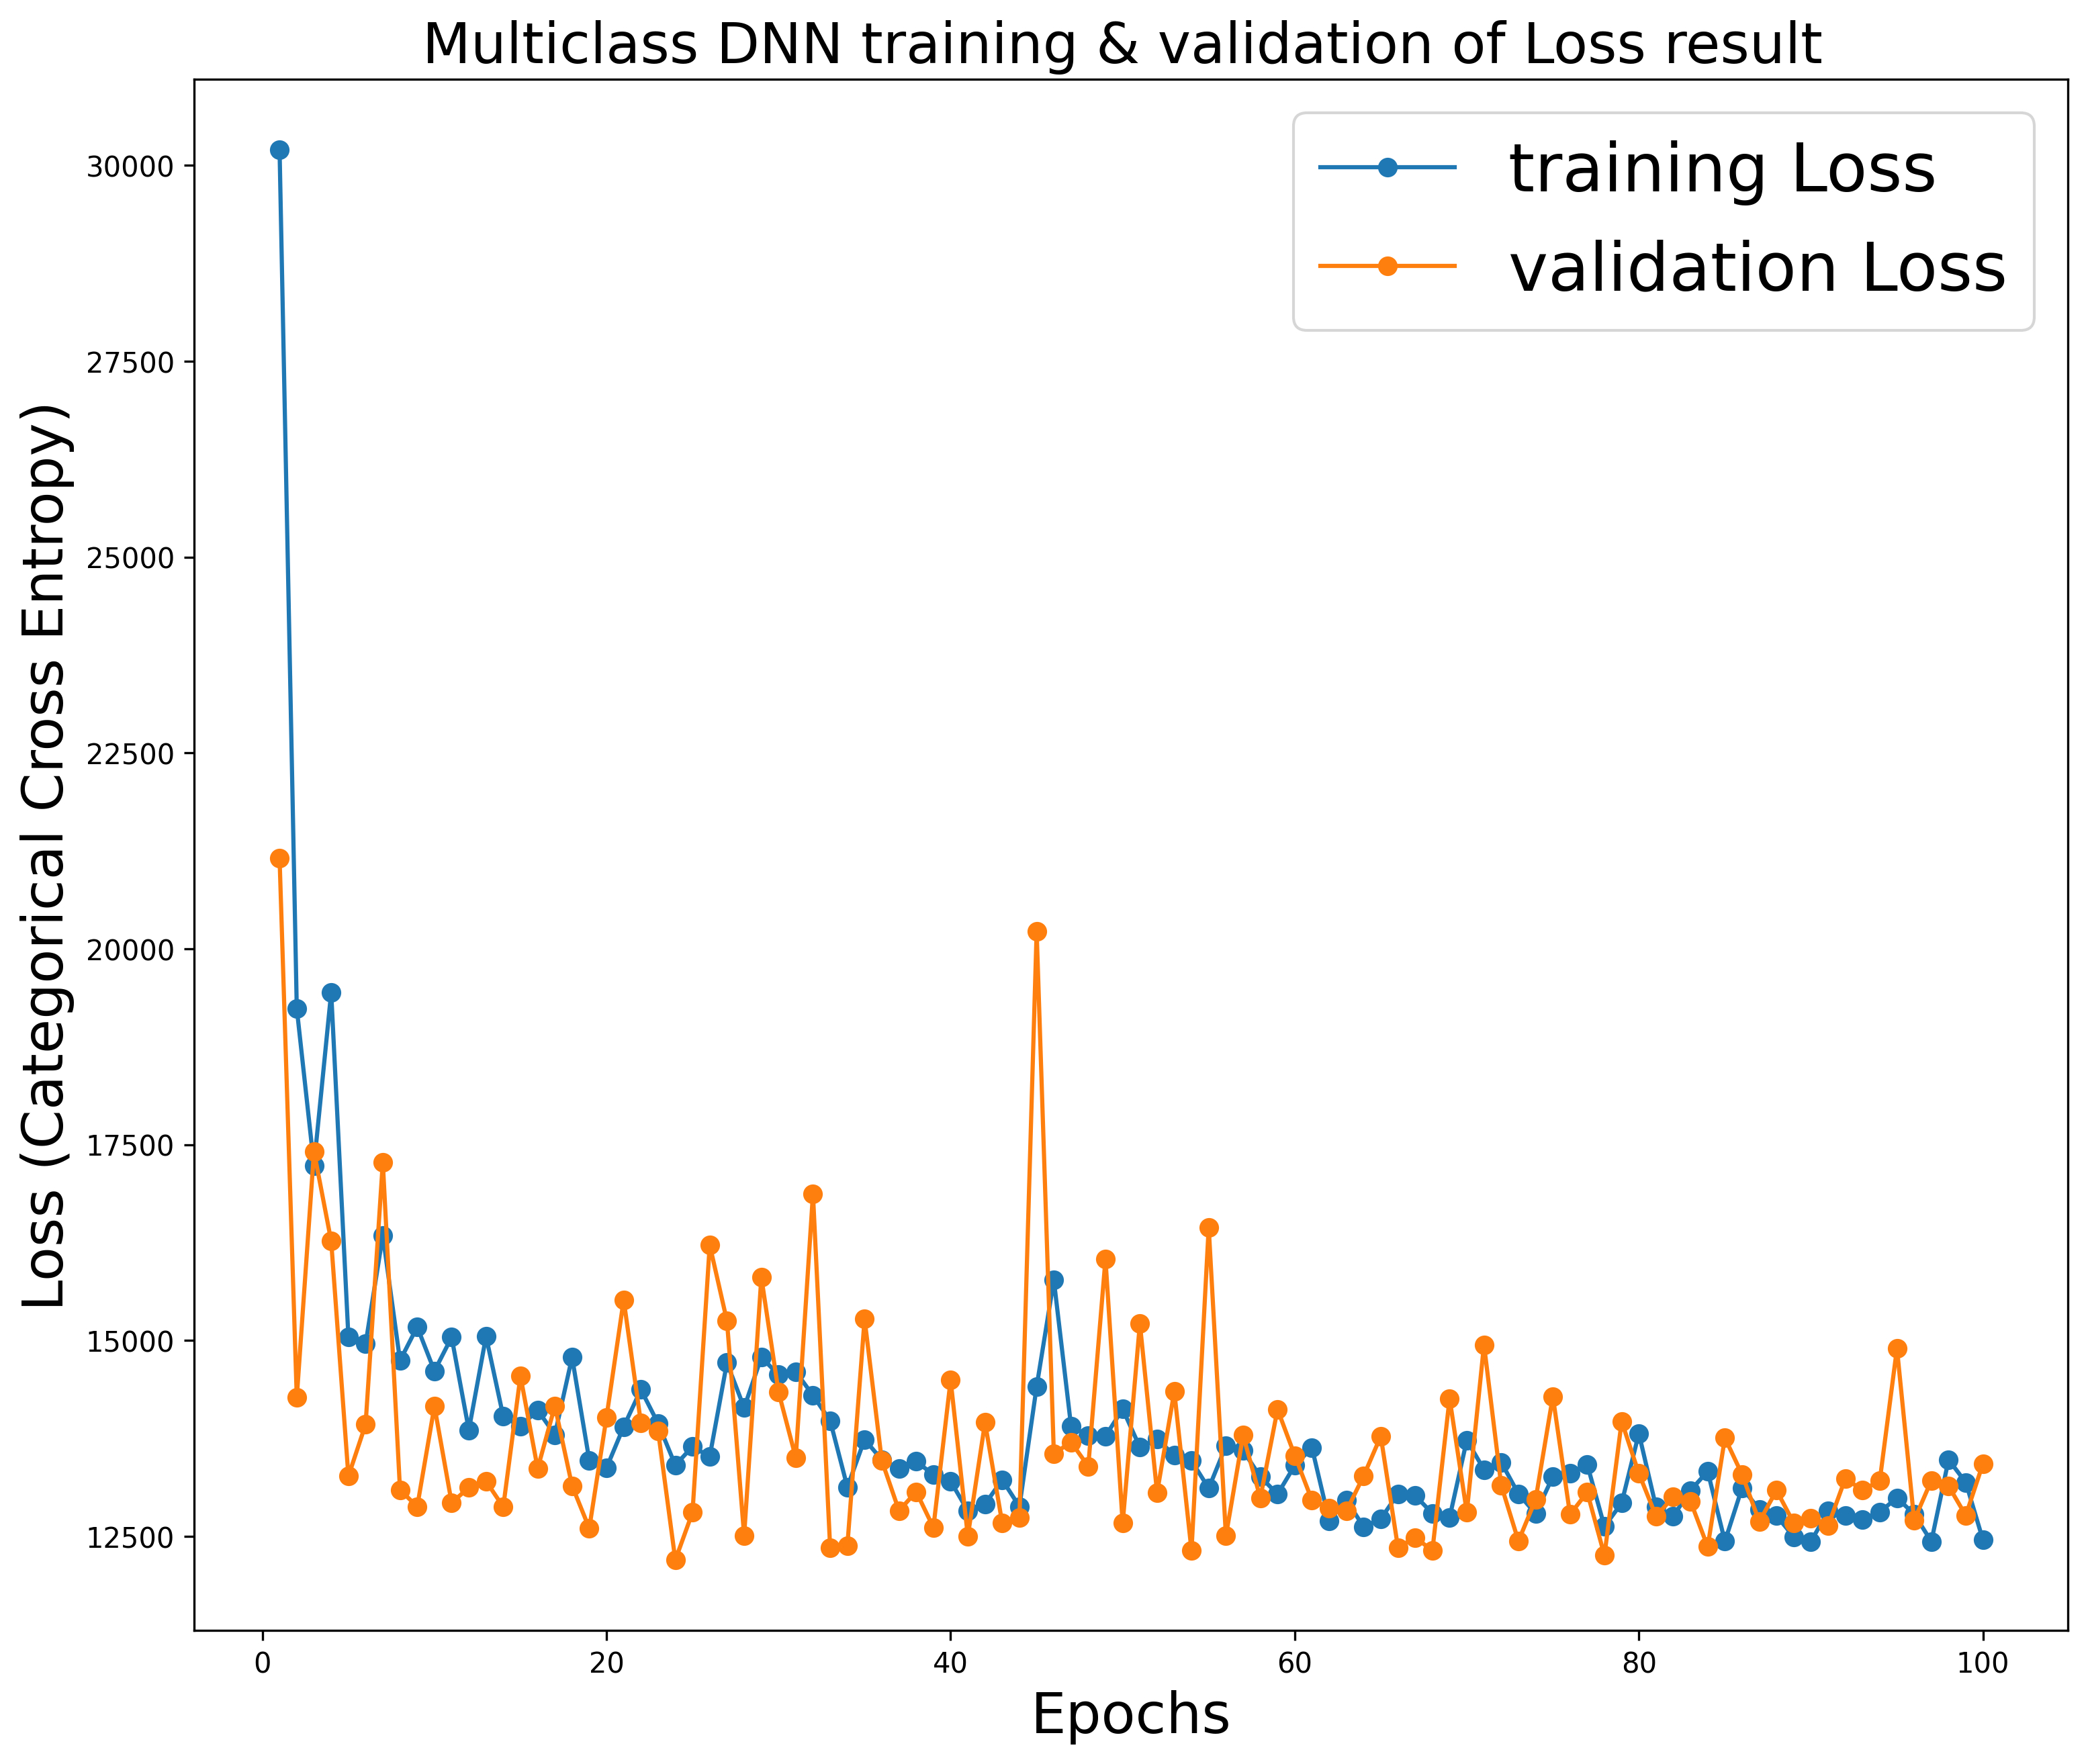

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()